# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This jupyter notebook is divided into three parts. The first part is about `pandas` data analysis. In the second part, we implement a clustering algorithm to group companies based on their stock price movements. In the final part, we explore ways to extend and improve this analysis. 

---

## Part 1: Pandas

The `pandas` library provides some effective tools for data analysis.

Two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [42]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

firms = price_data.columns

### 1: Returns

We calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [43]:
# Calculate company returns in this cell
returns_prices = (price_data - price_data.shift(1)) / price_data.shift(1)

### 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns.

Repeat with the lowest daily returns.

In [44]:
highest_10 = returns_prices.stack().nlargest(10) #We use stack to search the entire data frame
highest_10_values = highest_10.values #The first line returns a series, this has only the values
lowest_10 = returns_prices.stack().nsmallest(10)
lowest_10_values = lowest_10.values

print('The highest 10 returns were:')
print(highest_10)
print('')
print('The reasons for these rises were, respectively:')
text_higher = '''
Freeport-McMoRan's (FCX) 28.7% rise in stock value on 28/07/2015 was due to activist investor Carl Icahn becoming a majority shareholder.

Williams Companies Inc's (WMB) 25.9% rise in stock value on 22/06/2015 was due to rejecting a $48 billion buyout offer from rival Energy Transfer Equity LP.

Trip Advisor's (TRIP) 25.5% rise in stock value on 14/10/2015 was due to a deal with Priceline.

Harman International Industries's (HAR) 23.8% rise in stock value on 29/01/2015 was due o a deal with Chinese search engine Baidu Inc.

Qorvo's (QRVO) 23.2% rise in stock value on 06/11/2015 was due to an announcement where it proposed a $1 Billion Senior Notes Offering.

Wynn's (WYNN) 22.8% rise in stock value on 02/10/2015 was due to China signalling new support for Macau.

Trip Advisor's (TRIP) 22.5% rise in stock value on 12/02/2015 followed its fourth quarter and full-year 2014 earnings call where it detailed a plan to transform itself.

Humana's (HUM) 20.3% rise in stock value on 29/05/2015 came after WSJ reported a possible takeover as it hired Goldman Sachs to advise on a deal.

KLA Corporation's (KLAC) 18.8% rise in stock value on 21/10/2015 came after a $10.6 bln buyout by Lam Research.

Perrigo's (PRGO) 18.4% rise in stock value on 08/04/2015 came after Mylan proposed buying Perrigo and an announcement to trade at around $200 per share.
'''
print(text_higher)

print('The lowest 10 returns were:')
print(lowest_10)
print('')
text_lower = '''
Quanta Services's (PWR) 28.5% decrease in stock value on 16/10/2015 came after the company warned that third-quarter results wouldn't be as strong as expected.

Michael Kors's (KORS) 24.2% decrease in stock value on 27/05/2015 came after the release of its fourth quarter fiscal 2015 earnings, reporting a weak outlook and same-sstore sales decline.

Biogen's (BIIB) 22.1% decrease in stock value on 24/07/2015 was due to a lowering of its forecast for 2015 profit and sales.

Stericycle's (SRCL) 19.3% decrease in stock value on 23/10/2015 came after a the company's earnings release showed weak revenue growth and a complete lack of earnings growth.

Yum! Brands's (YUM) 18.8% decrease in stock value on 07/10/2015 came after it issued disappointing third-quarter results and reduced its full-year earnings guidance. 

Ralph Lauren Corp.’s (RL) 18.2% decrease in stock value on 04/02/2015 came after the company blindsided investors with a disappointing fiscal third-quarter report and outlook.

Micron's (MU) 18.2% decrease in stock value on 26/06/2015 came after after the company missed analyst estimates across the board when it reported its fiscal-third-quarter revenue.

NRG Energy's (NRG) 17.9% decrease in stock value on 04/12/2015 after the abrupt exit of its longtime CEO.

Mallinckrodt Plc's (MMK) 16.9% decrease in stock value on 09/11/2015 after the company was mentioned on Twitter by Citron Research, the stock-commentary site whose scrutiny lead another drug company's stock down.

Akamai Technologies's (AKAM) 16.7% decrease in stock value on 28/10/2015 after management set up disappointing guidance targets for the fourth quarter despite solid third-quarter results.
'''
print(text_lower)

The highest 10 returns were:
Date            
2015-08-27  FCX     0.286616
2015-06-22  WMB     0.258999
2015-10-14  TRIP    0.255361
2015-01-29  HAR     0.237600
2015-11-06  QRVO    0.232254
2015-10-02  WYNN    0.228389
2015-02-12  TRIP    0.224915
2015-05-29  HUM     0.203128
2015-10-21  KLAC    0.187895
2015-04-08  PRGO    0.183899
dtype: float64

The reasons for these rises were, respectively:

Freeport-McMoRan's (FCX) 28.7% rise in stock value on 28/07/2015 was due to activist investor Carl Icahn becoming a majority shareholder.

Williams Companies Inc's (WMB) 25.9% rise in stock value on 22/06/2015 was due to rejecting a $48 billion buyout offer from rival Energy Transfer Equity LP.

Trip Advisor's (TRIP) 25.5% rise in stock value on 14/10/2015 was due to a deal with Priceline.

Harman International Industries's (HAR) 23.8% rise in stock value on 29/01/2015 was due o a deal with Chinese search engine Baidu Inc.

Qorvo's (QRVO) 23.2% rise in stock value on 06/11/2015 was due to an 

### 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies.

Repeat with the lowest yearly returns.

In [45]:
import math
first_price = price_data.iloc[0]
last_price = price_data.iloc[-1] 

yearly_returns = (last_price - first_price) / first_price

highest_10_yearly_returns = yearly_returns.nlargest(10).round(2) * 100

lowest_10_yearly_returns = yearly_returns.nsmallest(10).round(2) * 100

print('The 10 highest yearly returns amongst all companies are:')
print(highest_10_yearly_returns)
print('')
print('The 10 lowest yearly returns amongst all companies are:')
print(lowest_10_yearly_returns)

The 10 highest yearly returns amongst all companies are:
NFLX    129.0
AMZN    119.0
ATVI     94.0
AYI      68.0
NVDA     66.0
GPN      60.0
HRL      56.0
EXR      54.0
VRSN     53.0
RAI      50.0
dtype: float64

The 10 lowest yearly returns amongst all companies are:
CHK    -77.0
SWN    -74.0
FCX    -70.0
KMI    -63.0
MU     -59.0
NRG    -56.0
RRC    -55.0
MRO    -55.0
MUR    -54.0
WYNN   -52.0
dtype: float64


### 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies.

Repeat with the lowest volatilities.

In [46]:
import math
yearly_volatilities = returns_prices.std()

highest_10_yearly_volatilities = yearly_volatilities.nlargest(10)*math.sqrt(252)*100

lowest_10_yearly_volatilities = yearly_volatilities.nsmallest(10)*math.sqrt(252)*100

print('The 10 highest yearly volatilities percentage amongst all companies are:')
print(highest_10_yearly_volatilities)
print('')
print('The 10 lowest yearly volatilities percentage amongst all companies are:')
print(lowest_10_yearly_volatilities)


The 10 highest yearly volatilities percentage amongst all companies are:
FCX     69.960956
CHK     67.917234
RIG     59.614219
SWN     55.876415
WYNN    55.430488
QRVO    53.136649
MNK     51.708210
WMB     51.153489
RRC     51.071703
NFLX    50.758597
dtype: float64

The 10 lowest yearly volatilities percentage amongst all companies are:
KO     14.386948
CHD    15.237196
AJG    15.415233
PEP    15.418437
CLX    15.437951
DVA    15.687928
T      15.784129
VZ     15.793572
RSG    15.831623
PG     16.042520
dtype: float64


### 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [47]:
correlations_returns = returns_prices.corr()

### 2.1

Next, analyse the correlations between the companies:
- We define functions to print out the $n$ top and bottom correlated companies for any given company. 
- We use the functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results.

In [72]:
def n_top_correlated_companies(company_index, number_of_companies):
    n_top_correlations = correlations_returns[company_index].drop(company_index).nlargest(number_of_companies)
    print(n_top_correlations)
    return 

def n_bottom_correlated_companies(company_index, number_of_companies):
    n_bottom_correlations = correlations_returns[company_index].drop(company_index).nsmallest(number_of_companies)
    print(n_bottom_correlations)
    return 

print('Amazon\'s top 5 related companies are:' )
n_top_correlated_companies('AMZN', 5)
print('')
print('Alphabet, Visa, Mastercard and Google are expected as they are tech companies. Starbucks is unexpected as it is not a tech company.')
print('')
print('Microsoft\'s top 5 related companies are:' )
n_top_correlated_companies('MSFT', 5)
print('')
print('Microsoft\'s correlations are unexpected as all top 5 correlations are not tech companies')
print('')
print('Facebook\'s top 5 related companies are:' )
n_top_correlated_companies('FB', 5)
print('')
print('Facebook\'s correlation to FISV and Google make sense, but the other 3 are unexpected')
print('')
print('Apple\'s top 5 related companies are:' )
n_top_correlated_companies('AAPL', 5)
print('')
print('Apple\'s correlation to FISV and SWKS is logical as semiconductors and fintech are closely related to Apple, but the other 3 are unexpected')
print('')
print('Google\'s top 5 related companies are:' )
n_top_correlated_companies('GOOGL', 5)
print('')
print('Google\'s correlation to Alphabet is self-explanatory, to Facebook and Amazon makes sense as well, as they are technology companies. To PGR and MA it is unexpected')

Amazon's top 5 related companies are:
GOOGL    0.585553
GOOG     0.584337
SBUX     0.571951
V        0.560704
MA       0.538708
Name: AMZN, dtype: float64

Alphabet, Visa, Mastercard and Google are expected as they are tech companies. Starbucks is unexpected as it is not a tech company.

Microsoft's top 5 related companies are:
MMC     0.604549
PG      0.604204
MA      0.590886
ADP     0.589445
SBUX    0.583705
Name: MSFT, dtype: float64

Microsoft's correlations are unexpected as all top 5 correlations are not tech companies

Facebook's top 5 related companies are:
FISV     0.619667
MA       0.617659
SBUX     0.598190
GOOGL    0.586548
TSS      0.580214
Name: FB, dtype: float64

Facebook's correlation to FISV and Google make sense, but the other 3 are unexpected

Apple's top 5 related companies are:
ITW     0.601265
NOC     0.589368
HON     0.576730
FISV    0.573935
SWKS    0.573350
Name: AAPL, dtype: float64

Apple's correlation to FISV and SWKS is logical as semiconductors and finte

## Part 2:  Clustering

In this part of the assignment, we develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### 3: Implementing the algorithm

Our task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [49]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. We'll implement this in the function `merge_clusters` below.

Finally, we'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. We'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If we only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do we actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

Load a pre-computed set of results up to this point using the following commands.

In [50]:
# Load intermediary results from a "pickle" file
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(0.598666164029738, 'MMM', 'ABT'),
 (0.32263699601940254, 'MMM', 'ABBV'),
 (0.6320593488560189, 'MMM', 'ACN'),
 (0.41855006701119907, 'MMM', 'ATVI'),
 (0.4508974957132859, 'MMM', 'AYI'),
 (0.4687548443045165, 'MMM', 'ADBE'),
 (0.25713165217544326, 'MMM', 'AAP'),
 (0.33537796741224424, 'MMM', 'AES'),
 (0.31737374099675925, 'MMM', 'AET'),
 (0.5059306055816828, 'MMM', 'AMG')]

### Clustering implementation

Functions to implement the clustering algorithm.

In [51]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    # Your code here
    x = node
    while next_nodes[x] != x:
            x = next_nodes[x]
    return x


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    # Your code here
    x = node1
    y = node2
    
    while next_nodes[x] != x:
            x = next_nodes[x]
            if x in set_starters:
                set_starters.remove(x)

    while next_nodes[y] != y:
            y = next_nodes[y]
            if y in set_starters:
                set_starters.remove(y)
    
    if y in set_starters:
                set_starters.remove(y)
    next_nodes[x] = y
    
    return
    pass


def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list, reverse=True)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        correlation, source, destination = sorted_edges.pop(0)
        
        bottom_source = find_bottom(source, next_nodes)
        bottom_destination = find_bottom(destination, next_nodes)
        
        if  bottom_source == bottom_destination:
            continue
        
        merge_sets(source, destination, next_nodes, set_starters)
        # Your algorithm here
        
    return set_starters, next_nodes

Once we've run the algorithm, we'll need to construct the clusters. We use the function below to do so.

In [52]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

### Question 3.2: analysing the results

After having implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

The algorithm we have implemented is a variation of Kruskal's algorithm. Usually, Kruskal's algorithm is used to find a minimum spanning spanning forest of an undirected edge-weighted graph. In our case, rather than connecting nodes considering the minimum distance between them we evaluate the correlation between companies (connecting the highest first). Similarly to Kruskal's algorithm we also connect all nodes although in our scenario we have directed edges which leads us to have a botttom node.

Bellow we find the results for k=20 i.e. 20 iterations. Firstly, we present the clusters dictionary. We note from both the dictionary and the graphical representation that most companies are still in self-loops (outside circle) which is to be expected as they are initialized pointing to themselves. Additionaly, we note we have 480 starting nodes compared to the initial 496.

480
{'AMT': {'AMT'}, 'ECL': {'ECL'}, 'QCOM': {'QCOM'}, 'FCX': {'FCX'}, 'ADM': {'ADM'}, 'COF': {'COF'}, 'MON': {'MON'}, 'EMN': {'EMN'}, 'CI': {'CI'}, 'GE': {'GE'}, 'HCN': {'HCN'}, 'NRG': {'NRG'}, 'EXR': {'EXR'}, 'CAH': {'CAH'}, 'AEP': {'AEP'}, 'T': {'T'}, 'CNP': {'CNP'}, 'BSX': {'BSX'}, 'TGT': {'TGT'}, 'AN': {'AN'}, 'PGR': {'PGR'}, 'PPL': {'PPL'}, 'DHI': {'DHI'}, 'MU': {'MU'}, 'NTRS': {'NTRS'}, 'TSCO': {'TSCO'}, 'SO': {'SO'}, 'AMG': {'AMG'}, 'PG': {'PG'}, 'ADP': {'ADP'}, 'VRSN': {'VRSN'}, 'GS': {'GS'}, 'FLS': {'FLS'}, 'ALK': {'ALK'}, 'PXD': {'PXD'}, 'OMC': {'OMC'}, 'SYMC': {'SYMC'}, 'WHR': {'WHR'}, 'KIM': {'KIM'}, 'LUV': {'LUV'}, 'MOS': {'MOS'}, 'SHW': {'SHW'}, 'DAL': {'DAL'}, 'AMGN': {'AMGN'}, 'F': {'F'}, 'HST': {'HST'}, 'AIV': {'AIV'}, 'ETFC': {'ETFC'}, 'EQIX': {'EQIX'}, 'PPG': {'PPG'}, 'RTN': {'RTN'}, 'JNJ': {'JNJ'}, 'FMC': {'FMC'}, 'HES': {'HES'}, 'TDG': {'TDG'}, 'CVX': {'CVX'}, 'WMT': {'WMT'}, 'SLG': {'SLG'}, 'SE': {'SE'}, 'AEE': {'AEE'}, 'VRTX': {'VRTX'}, 'CERN': {'CERN'}, 'WM': {

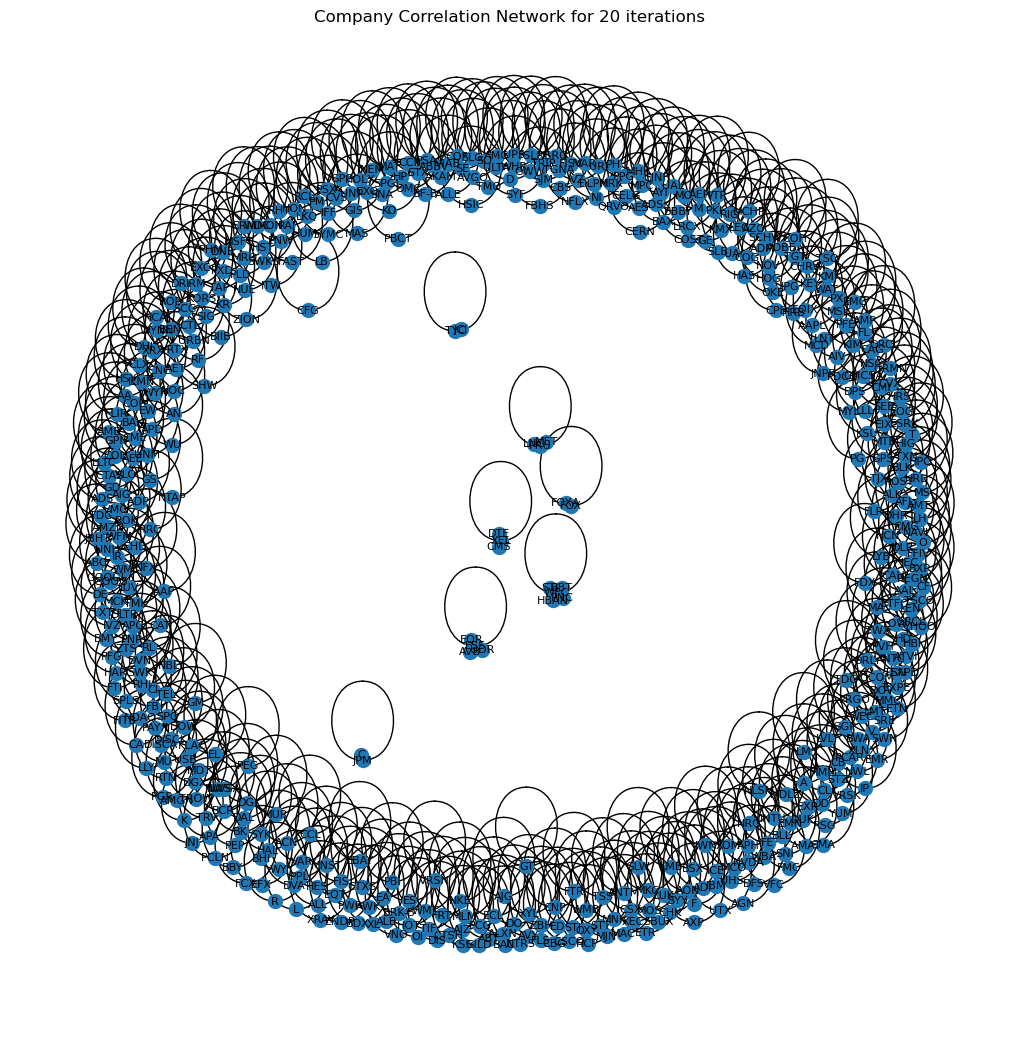

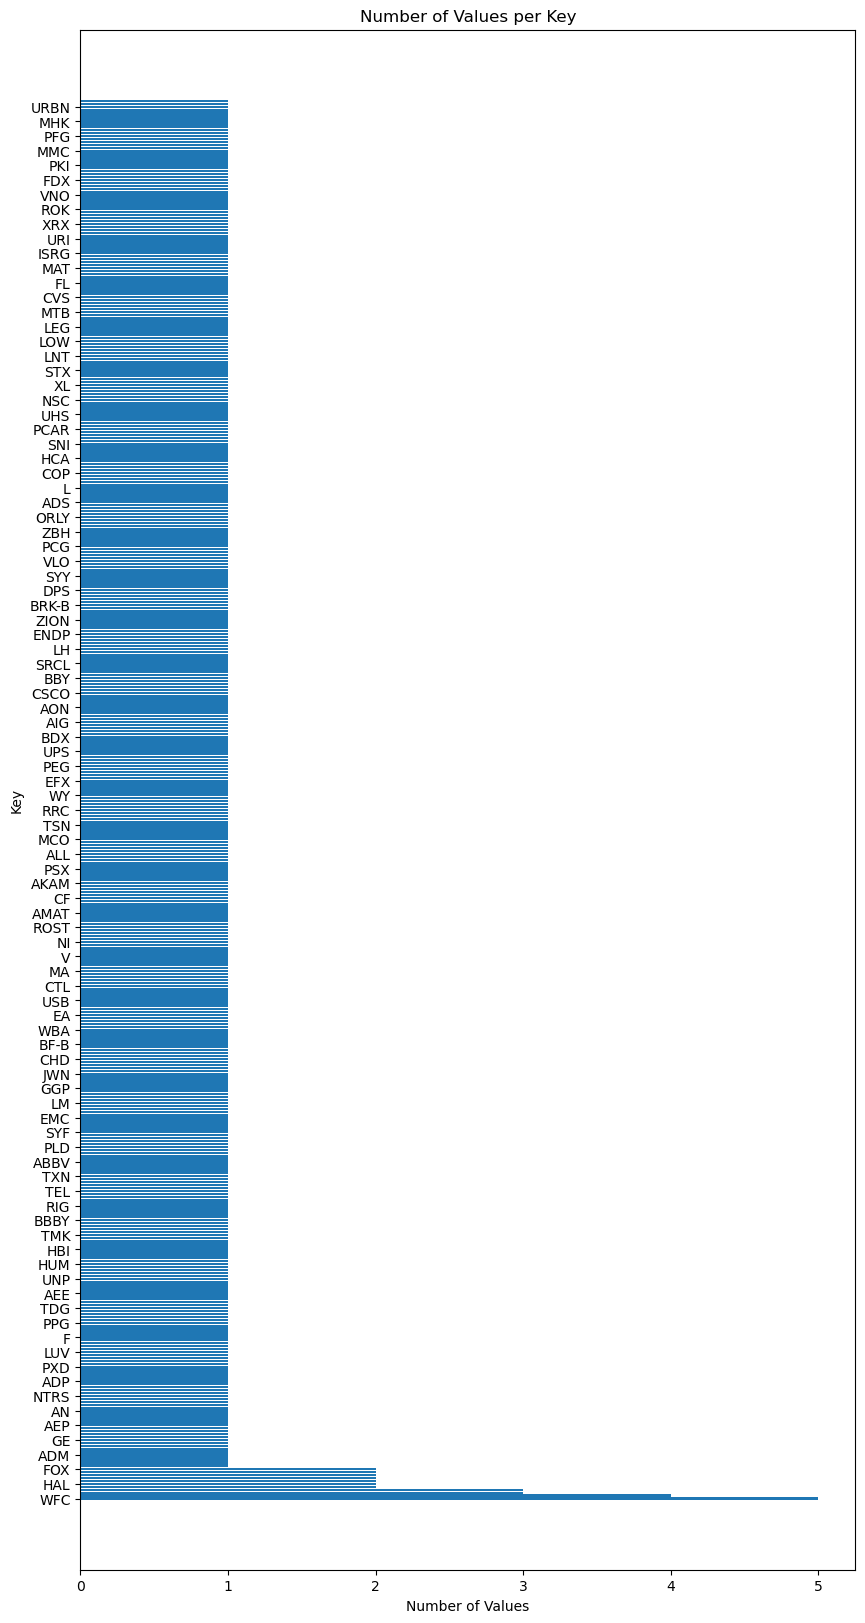

In [53]:
import networkx as nx
import pprint

edge_list = create_correlation_list(correlations_returns)
set_starters , next_nodes = cluster_correlations(edge_list, firms, k=20)
all_clusters = construct_sets(set_starters,next_nodes)

print(len(set_starters))
print(all_clusters)

G = nx.Graph()
for company, correlated_companies in all_clusters.items():
    for correlated_company in correlated_companies:
        G.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 20 iterations')
plt.show()

import matplotlib.pyplot as plt

data = all_clusters
key_counts = {key: len(value) for key, value in data.items()}

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key')

plt.show()

Bellow we find the results for k=2000 i.e. 2000 iterations. Firstly, we present the clusters dictionary. We note from both the dictionary and the graphical representation that as expected we have more connections than for the previous scenario. Although there is still a considerable number of self-loops (represented on the outside) we also begin having denser clusters in the middle. Moreover, we have gone down from 343 starting nodes ot 4

343
{'NI': {'AMT', 'DUK', 'FE', 'D', 'FRT', 'KIM', 'O', 'SPG', 'BXP', 'ES', 'GGP', 'DTE', 'EXC', 'AIV', 'HCP', 'HCN', 'PSA', 'EXR', 'ED', 'PLD', 'AEP', 'CNP', 'PNW', 'AVB', 'SRE', 'AWK', 'LNT', 'PPL', 'EQR', 'DLR', 'VNO', 'SO', 'WEC', 'CMS', 'VTR', 'ETR', 'ESS', 'PEG', 'CCI', 'SLG', 'PCG', 'SCG', 'NI', 'EIX', 'UDR', 'XEL', 'AEE'}, 'XLNX': {'FLR', 'ECL', 'LM', 'CME', 'HIG', 'AMP', 'JEC', 'BDX', 'EQT', 'AIG', 'XL', 'COF', 'BAC', 'HON', 'DO', 'EMN', 'APH', 'DHR', 'CA', 'AON', 'BWA', 'CAH', 'EOG', 'T', 'TRV', 'ACN', 'INTU', 'GPC', 'PGR', 'TXT', 'XEC', 'NTRS', 'SWK', 'ITW', 'TSCO', 'CHD', 'NOC', 'AMG', 'PG', 'LOW', 'BA', 'ADP', 'GS', 'FLS', 'PXD', 'KMB', 'OMC', 'MTB', 'JPM', 'PBCT', 'TROW', 'SCHW', 'KEY', 'CLX', 'XYL', 'APC', 'SHW', 'ABT', 'AMGN', 'ZION', 'BK', 'GIS', 'CL', 'ETFC', 'MDT', 'NDAQ', 'MET', 'KMI', 'USB', 'BRK-B', 'SPGI', 'MKC', 'DPS', 'PH', 'PPG', 'RTN', 'ADI', 'CB', 'JNJ', 'LMT', 'AME', 'MA', 'V', 'HES', 'MS', 'REGN', 'CVX', 'LLL', 'STI', 'SLB', 'CELG', 'PRU', 'SE', 'MRO', 'HA

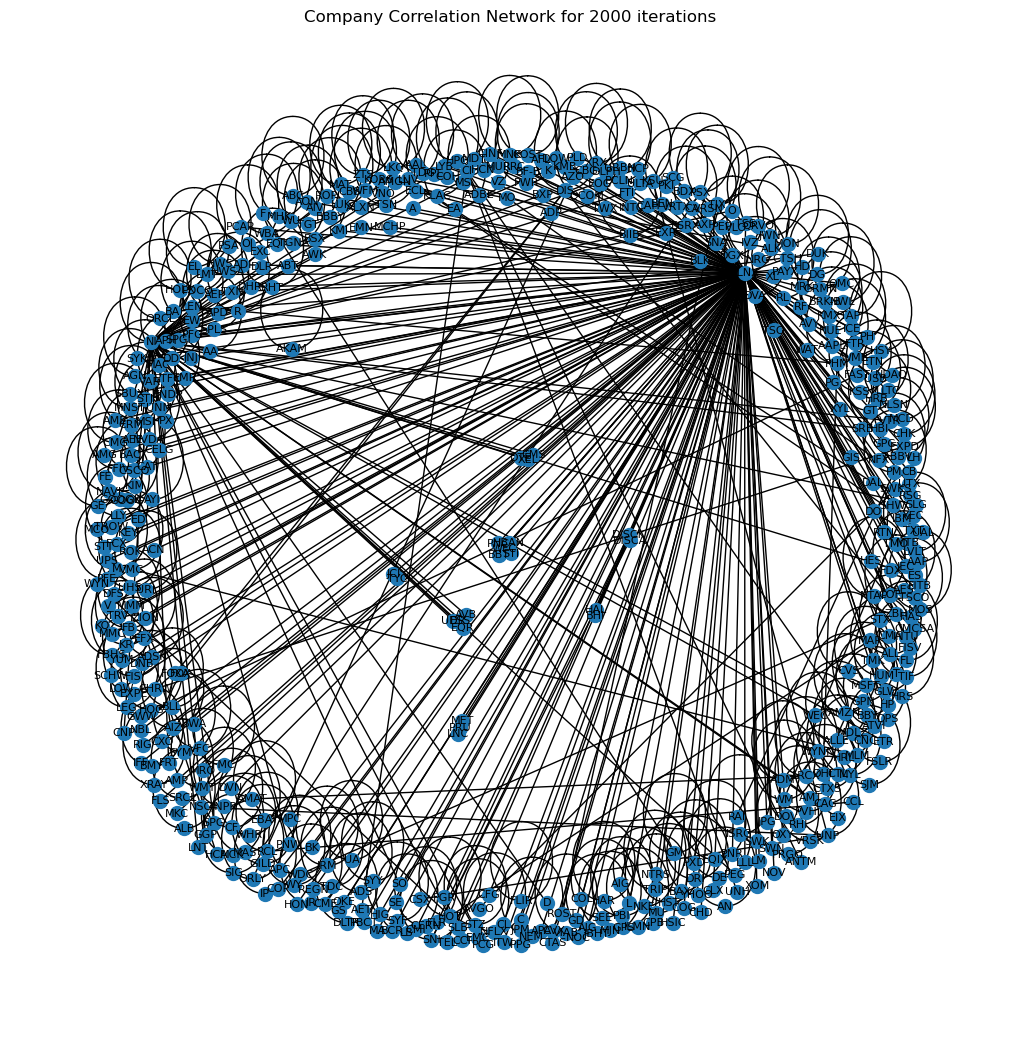

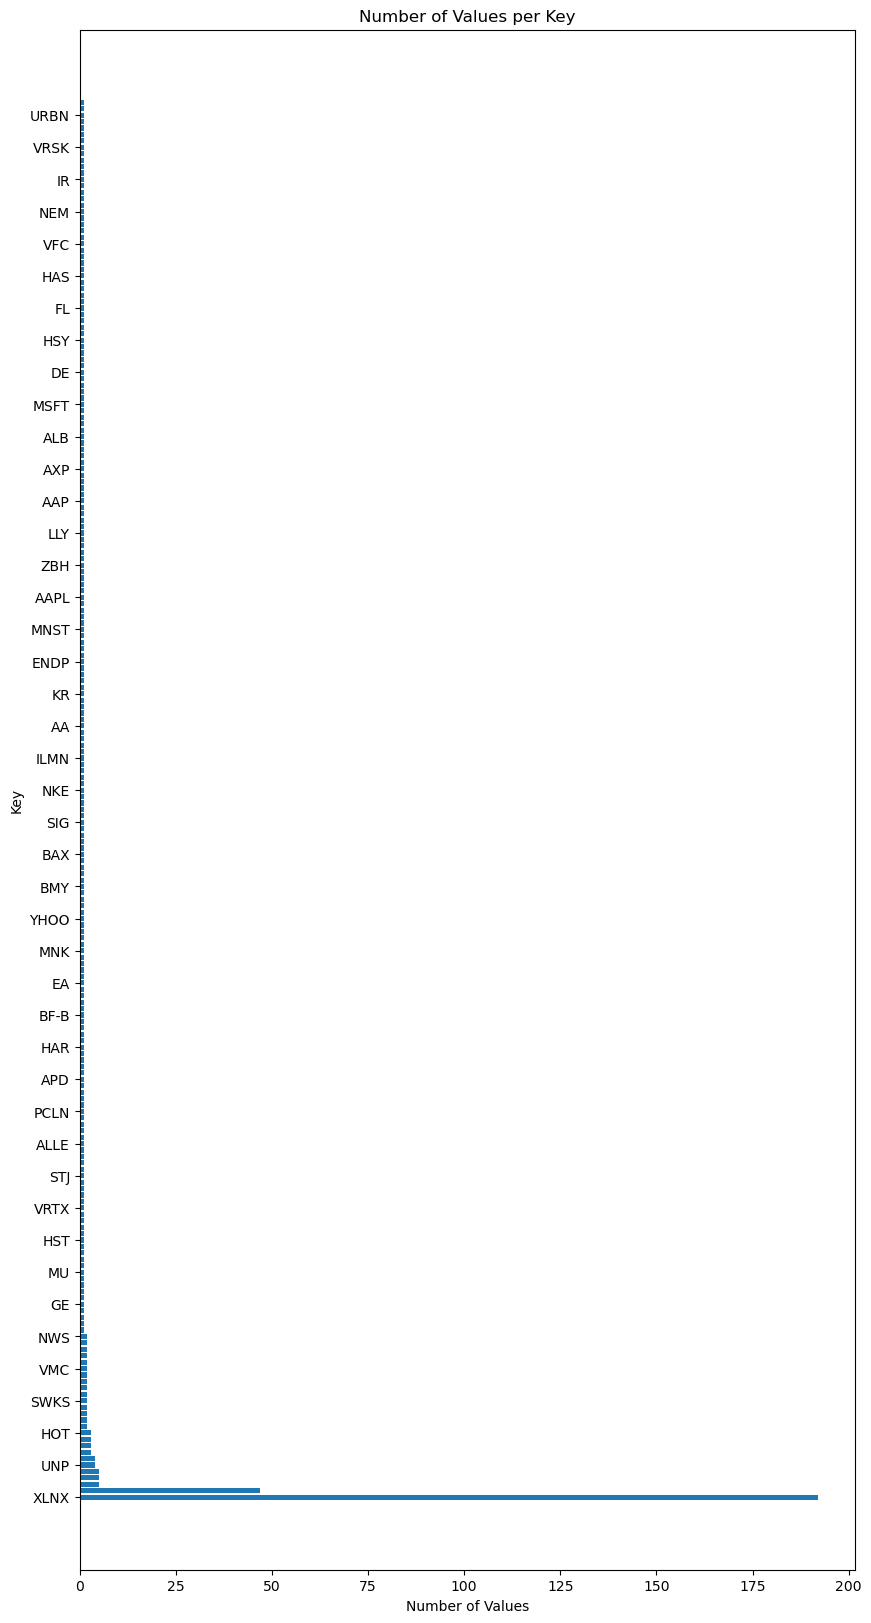

In [54]:
set_starters1 , next_nodes1 = cluster_correlations(edge_list, firms, k=2000)
all_clusters1 = construct_sets(set_starters1,next_nodes1)

print(len(set_starters1))
print(all_clusters1)

G1 = nx.Graph()
for company, correlated_companies in all_clusters1.items():
    for correlated_company in correlated_companies:
        G1.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G) 
nx.draw(G1, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 2000 iterations')
plt.show()

data = all_clusters1
key_counts = {key: len(value) for key, value in data.items()}

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key')

plt.show()

Bellow we find the results for k=20000 i.e. 20000 iterations. Firstly, we present the clusters dictionary. We note from both the dictionary and the graphical representation that now we have very few self-loops, meaning most companies have a connection to a cluster. At the center of the graphical representation we have a very dense cluster. Additionaly, there are now only 264 starting nodes.

The set of clusters for 20000 iterations is:
264
{'SYY': {'AMT', 'ECL', 'FCX', 'ADM', 'COF', 'MON', 'DTE', 'EMN', 'CI', 'GE', 'HCN', 'NRG', 'EXR', 'CAH', 'AEP', 'T', 'CNP', 'TGT', 'BSX', 'AN', 'PGR', 'PPL', 'DHI', 'NTRS', 'MU', 'EQR', 'TSCO', 'SO', 'AMG', 'PG', 'VRSN', 'ADP', 'GS', 'FLS', 'ALK', 'PXD', 'OMC', 'SYMC', 'WHR', 'JPM', 'MOS', 'LUV', 'KIM', 'SHW', 'DAL', 'AMGN', 'F', 'HST', 'AIV', 'ETFC', 'MET', 'EQIX', 'PPG', 'RTN', 'JNJ', 'FMC', 'HES', 'TDG', 'CVX', 'WMT', 'PRU', 'SLG', 'SE', 'AEE', 'VRTX', 'WM', 'CERN', 'UNP', 'NVDA', 'HOLX', 'GOOG', 'STJ', 'CHK', 'HUM', 'AVB', 'DFS', 'BEN', 'SNA', 'IPG', 'UA', 'MRK', 'IBM', 'TMK', 'PM', 'WEC', 'ALLE', 'RHT', 'CMI', 'CCI', 'BBBY', 'AMZN', 'MCHP', 'ICE', 'RIG', 'KMX', 'PCLN', 'JBHT', 'TEL', 'XOM', 'DVN', 'DOV', 'D', 'TXN', 'FRT', 'CMA', 'LLTC', 'TMO', 'ABBV', 'HCP', 'RAI', 'HD', 'ALXN', 'PLD', 'AJG', 'OXY', 'DISCK', 'GOOGL', 'UNM', 'FAST', 'MUR', 'CHRW', 'ETR', 'ESS', 'PNC', 'APD', 'EMC', 'BHI', 'PSA', 'CMCSA', 'FLR', 'LM', 'AAL', 'WMB', '

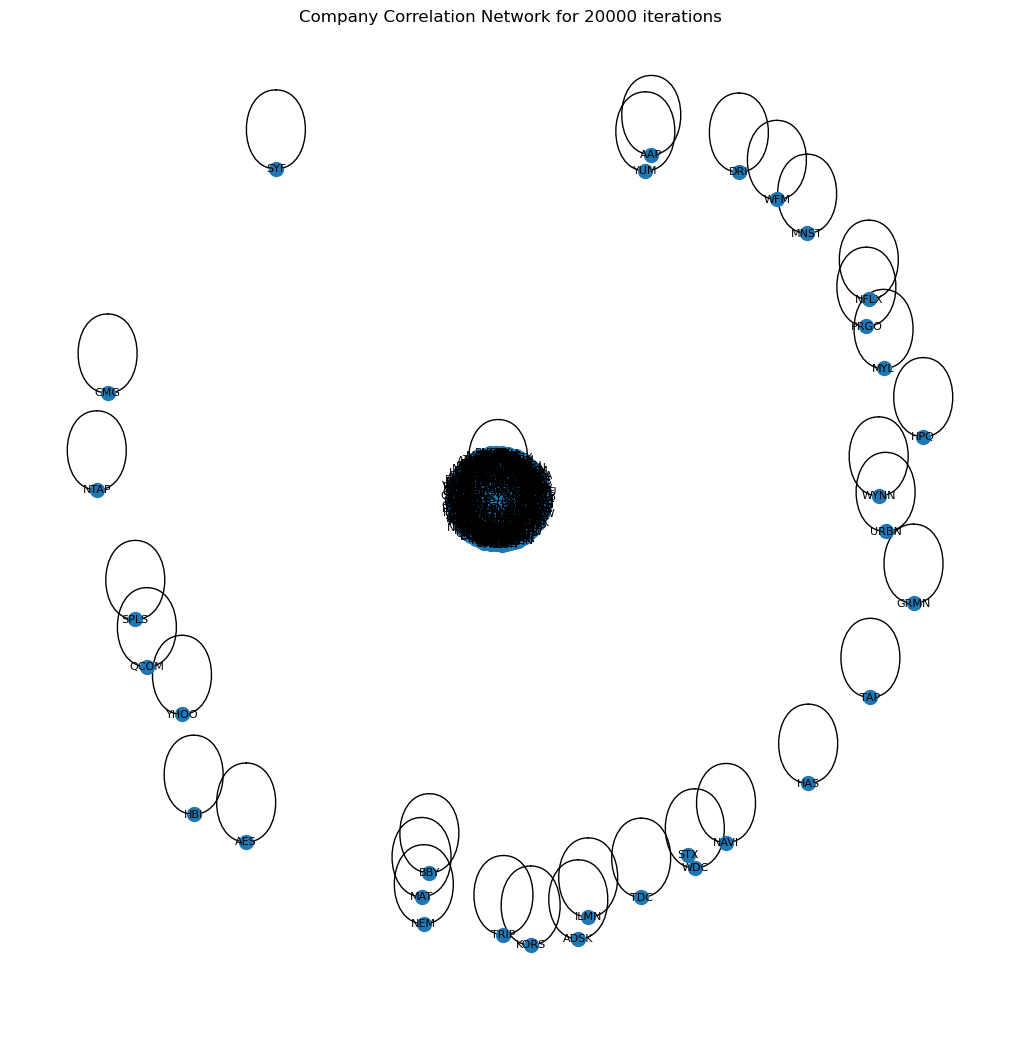

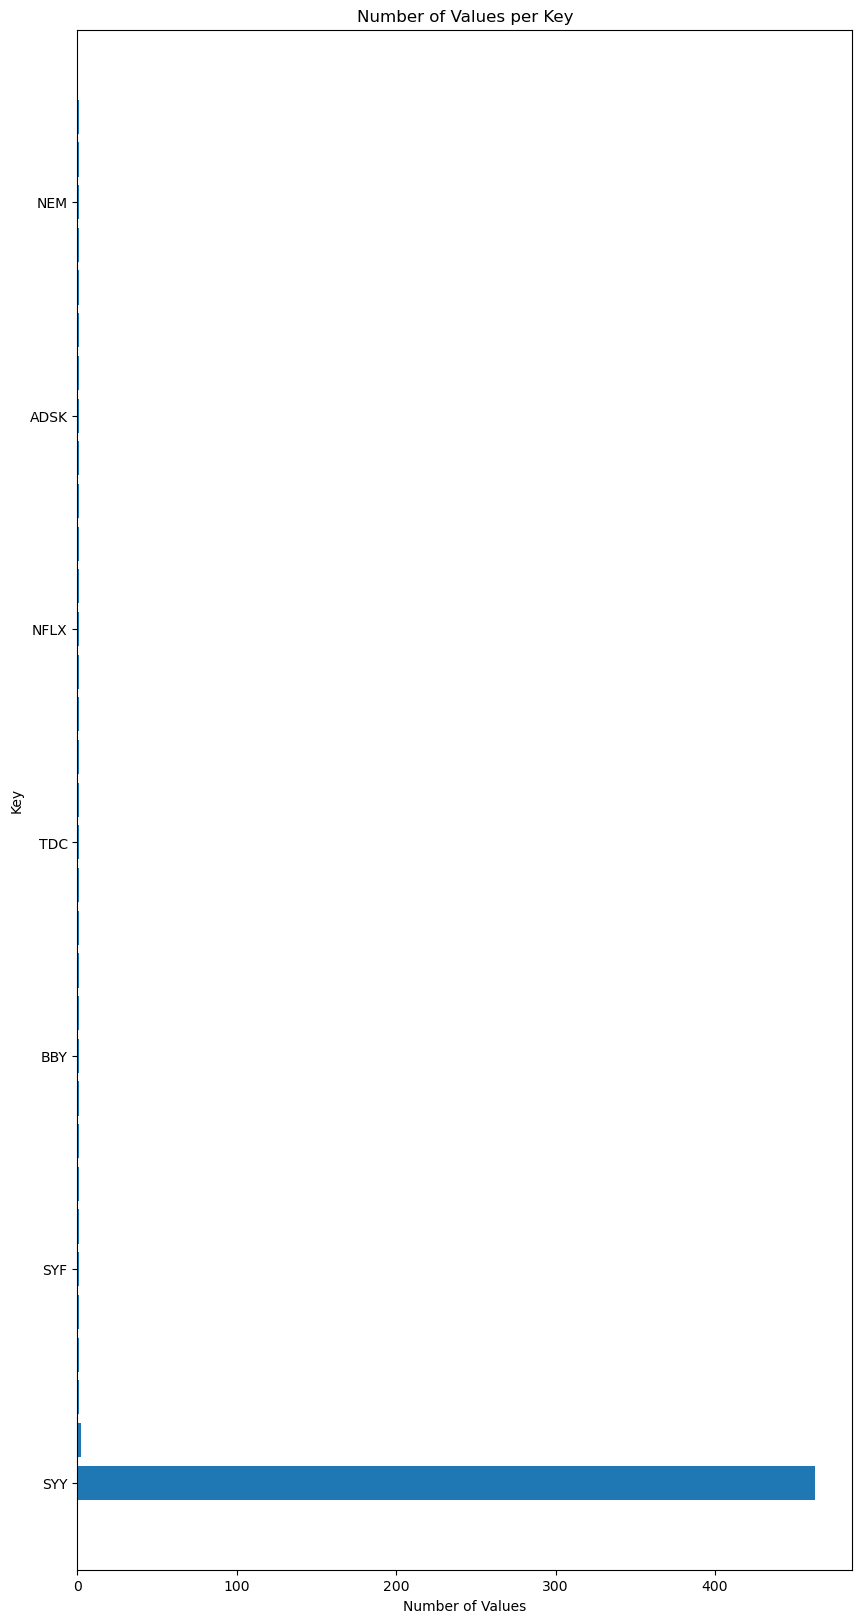

In [55]:
set_starters2 , next_nodes2 = cluster_correlations(edge_list, firms, k=20000)
all_clusters2 = construct_sets(set_starters2,next_nodes2)

print('The set of clusters for 20000 iterations is:')

print(len(set_starters2))
print(all_clusters2)

G2 = nx.Graph()
for company, correlated_companies in all_clusters2.items():
    for correlated_company in correlated_companies:
        G2.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G2) 
nx.draw(G2, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 20000 iterations')
plt.show()

data = all_clusters2
key_counts = {key: len(value) for key, value in data.items()}

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key')

plt.show()

Bellow we find the results for k=122760 i.e. 122760 iterations. Firstly, we present the clusters dictionary. This number of iterations is the same as the number of edges meaning all edges have now been processed. We note that all companies are now in the same cluster with WFM being the bottom node. Moreover, we notice that the number of starting nodes is close to the one for 20000 iterations which indicates the number of starting nodes hits an almost plateau rather early in the number of iterations.

246
{'WFM': {'AMT', 'ECL', 'QCOM', 'FCX', 'ADM', 'COF', 'MON', 'DTE', 'EMN', 'CI', 'GE', 'HCN', 'NRG', 'EXR', 'CAH', 'AEP', 'T', 'CNP', 'TGT', 'BSX', 'AN', 'PGR', 'PPL', 'DHI', 'NTRS', 'MU', 'EQR', 'TSCO', 'SO', 'AMG', 'PG', 'VRSN', 'ADP', 'GS', 'FLS', 'ALK', 'PXD', 'OMC', 'SYMC', 'WHR', 'JPM', 'MOS', 'LUV', 'KIM', 'SHW', 'DAL', 'AMGN', 'F', 'HST', 'AIV', 'ETFC', 'MET', 'EQIX', 'PPG', 'RTN', 'JNJ', 'FMC', 'HES', 'TDG', 'CVX', 'WMT', 'PRU', 'SLG', 'SE', 'AEE', 'VRTX', 'WM', 'CERN', 'UNP', 'HPQ', 'NVDA', 'HOLX', 'GOOG', 'STJ', 'CHK', 'HUM', 'AVB', 'DFS', 'BEN', 'SNA', 'IPG', 'HBI', 'UA', 'MRK', 'IBM', 'TMK', 'PM', 'WEC', 'ALLE', 'RHT', 'CMI', 'CCI', 'BBBY', 'AMZN', 'MCHP', 'ICE', 'RIG', 'KMX', 'PCLN', 'WDC', 'JBHT', 'TEL', 'XOM', 'DVN', 'DOV', 'D', 'TXN', 'FRT', 'CMA', 'LLTC', 'TMO', 'ABBV', 'HCP', 'RAI', 'HD', 'ALXN', 'PLD', 'AJG', 'OXY', 'DISCK', 'GOOGL', 'UNM', 'FAST', 'SYF', 'MUR', 'CHRW', 'ETR', 'ESS', 'PNC', 'APD', 'EMC', 'BHI', 'PSA', 'CMCSA', 'FLR', 'LM', 'AAL', 'WMB', 'JEC', 'VM

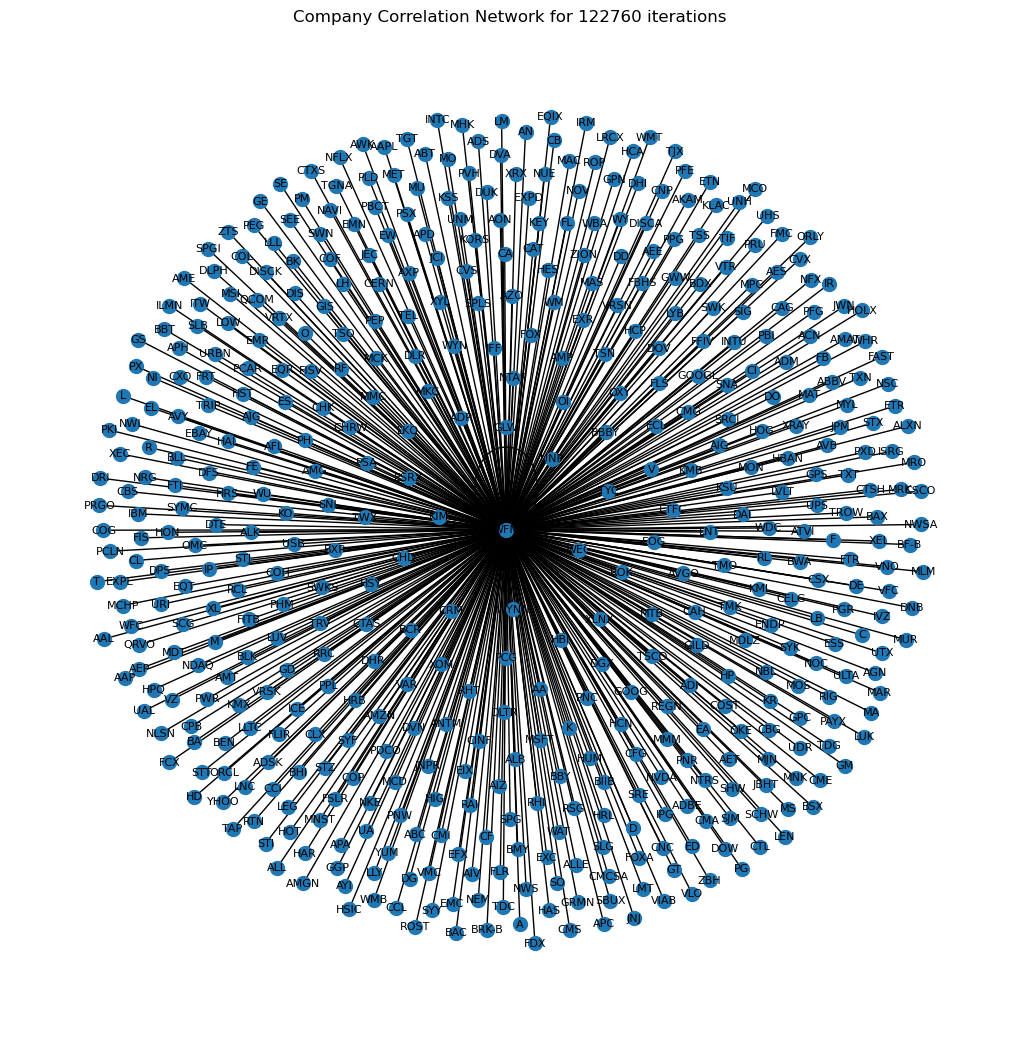

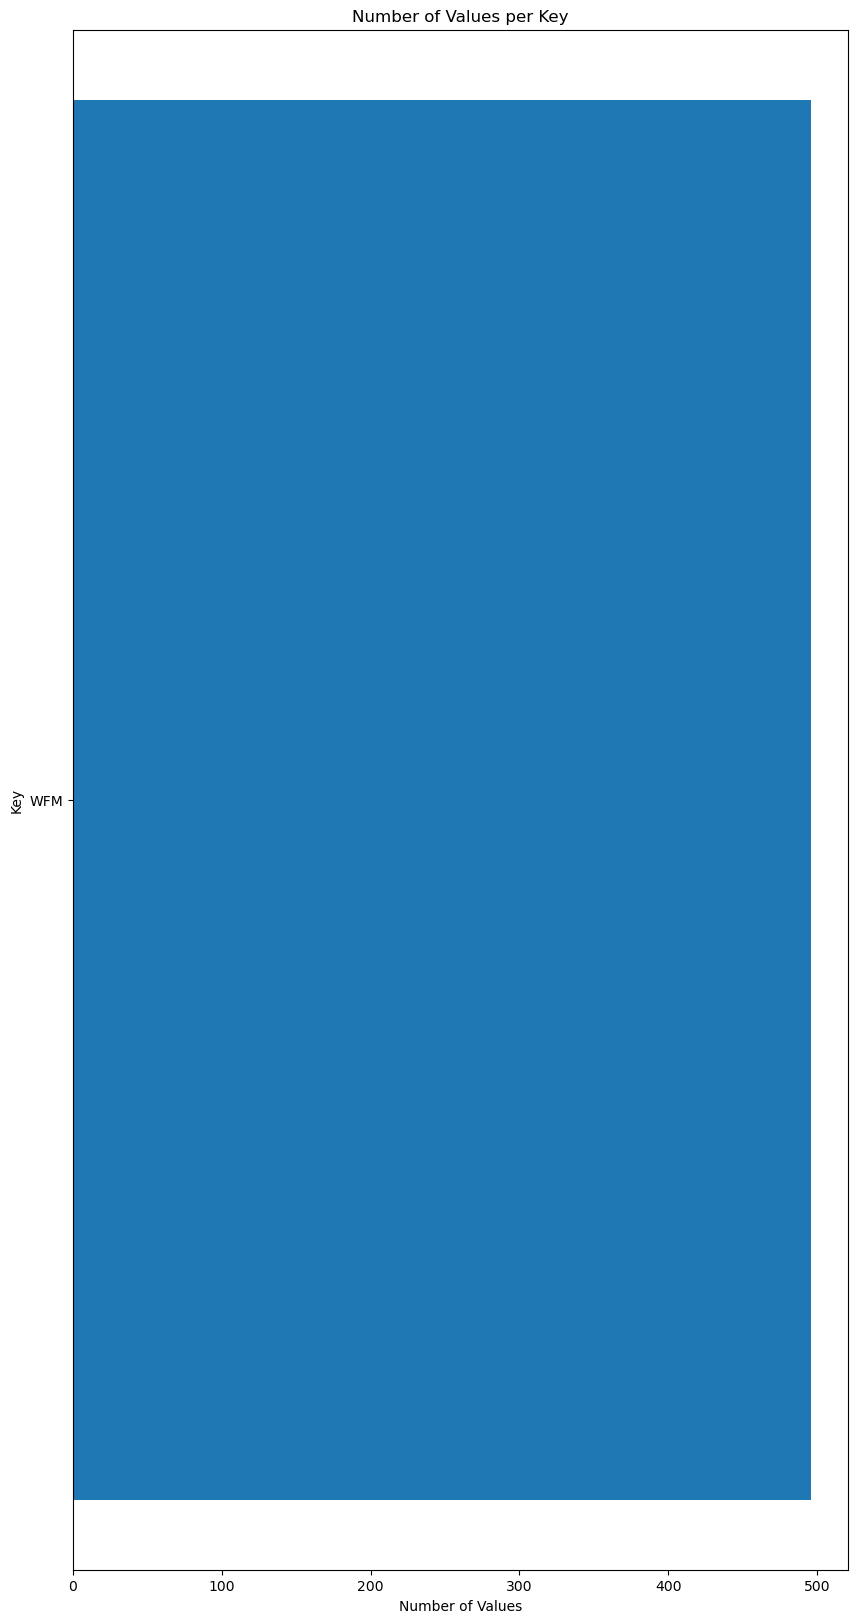

In [56]:
set_starters3 , next_nodes3 = cluster_correlations(edge_list, firms, k=122760)
all_clusters3 = construct_sets(set_starters3,next_nodes3)

print(len(set_starters3))
print(all_clusters3)

G3 = nx.Graph()
for company, correlated_companies in all_clusters3.items():
    for correlated_company in correlated_companies:
        G3.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 122760 iterations')
plt.show()

data = all_clusters3
key_counts = {key: len(value) for key, value in data.items()}

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key')

plt.show()

## Part 3: Other Clustering Methods & In-depth Analysis

### What is Pairs Trading?
Pairs trading is a popular trading strategy in financial markets that involves the simultaneous buying and selling (or shorting) of two related or correlated financial instruments, typically stocks. The goal of pairs trading is to profit from the relative price movements between the two instruments.

### How to Implement Pair Trading Strategy?

- **Pair Selection**: Traders identify a pair of financial instruments that historically have exhibited a high degree of correlation. This correlation indicates that the prices of the two instruments tend to move together in a similar direction.

- **Calculation of Spread**: The historical price relationship between the two instruments is analyzed, and a spread is calculated based on the price ratio or the price difference between the two instruments. This spread is used to determine potential trading opportunities.

- **Establishing Positions**: If the spread deviates from its historical average or a predetermined threshold, traders take positions. If the spread widens beyond the historical norm, they go long on the underperforming instrument (buy the instrument), expecting it to increase in value. Simultaneously, they go short on the outperforming instrument (sell the instrument), expecting it to decrease in value.

- **Monitoring and Reversion to Mean**: Traders monitor the positions and wait for the spread to revert to its historical average or mean. When the spread narrows, they can close their positions, aiming to make a profit. The strategy is based on the belief that the prices of the two instruments will converge over time.

### Step 1. Finding a pair

**When implementing a pairs trading strategy, finding a pair of assets with a cointegrated relationship is fundamental. Cointegration suggests that there is a long-term relationship between the two assets, which can be exploited for pairs trading.** 

- Selecting Potential Pairs:
There are lots of pairs we can form out of 496 stocks, so reduce the number of pairs let's do clustering using the algoritm implemented above.  

In [57]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [58]:
def create_correlation_list(correl):
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L


def find_bottom(node, next_nodes):
    while next_nodes[node] != node:
        node = next_nodes[node]
    return node


def merge_sets(node1, node2, next_nodes, set_starters):
    next_nodes[node1] = node2
    set_starters.discard(node2)


def cluster_correlations(edge_list, firms, k=200):
    sorted_edges = sorted(edge_list, reverse=True)
    next_nodes = {node: node for node in firms}
    set_starters = {node for node in firms}

    for i in range(k):
        edge = sorted_edges[i]
        source = edge[1]
        destination = edge[2]
        bottom_node_source = find_bottom(source, next_nodes)
        bottom_node_destination = find_bottom(destination, next_nodes)
        if(bottom_node_source != bottom_node_destination):
            merge_sets(bottom_node_source, destination, next_nodes, set_starters)
        
    return set_starters, next_nodes


def construct_sets(set_starters, next_nodes):
    all_sets = dict()

    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

def get_clusters(price_data):
    stocks_corr_matrix = price_data.corr()
    edges = create_correlation_list(stocks_corr_matrix)
    firms = stocks_corr_matrix.columns
    set_starters , next_nodes = cluster_correlations(edges, firms, 500)
    all_clusters = construct_sets(set_starters,next_nodes)  
    return all_clusters

##### Load Price Data and Get All Clusters

In [59]:
## Let's first load up this data.

filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

all_clusters = get_clusters(price_data)

In [60]:
## Clusters with minimum 4 stocks and converting a dictionary to list of clusters
bigger_cluster = []
for key in all_clusters.keys():
    if len(all_clusters[key]) > 1: 
        cluster_set = set(all_clusters[key])
        cluster_set.add(key)
        bigger_cluster.append(cluster_set)

#### Find the pair with statistically significant cointegration

We want the P val < 0.05 for the augmented Engle-Granger two-step cointegration test
**(meaning that cointegration exists)**

We ran a loop on our clusters to find a pair which are cointegrated statistically and found out that **ACN** and **CTXS** are 
statistically significant

In [61]:
import statsmodels.tsa.stattools as ts 
cointegration_result = ts.coint(price_data['ACN'], price_data['CTXS'])
print(f"p value for the Engle-Granger Two Step Cointegration Test is  {cointegration_result[1]}")

p value for the Engle-Granger Two Step Cointegration Test is  0.0016867816772382818


##### Plot and see whether price chart of stocks are correlated


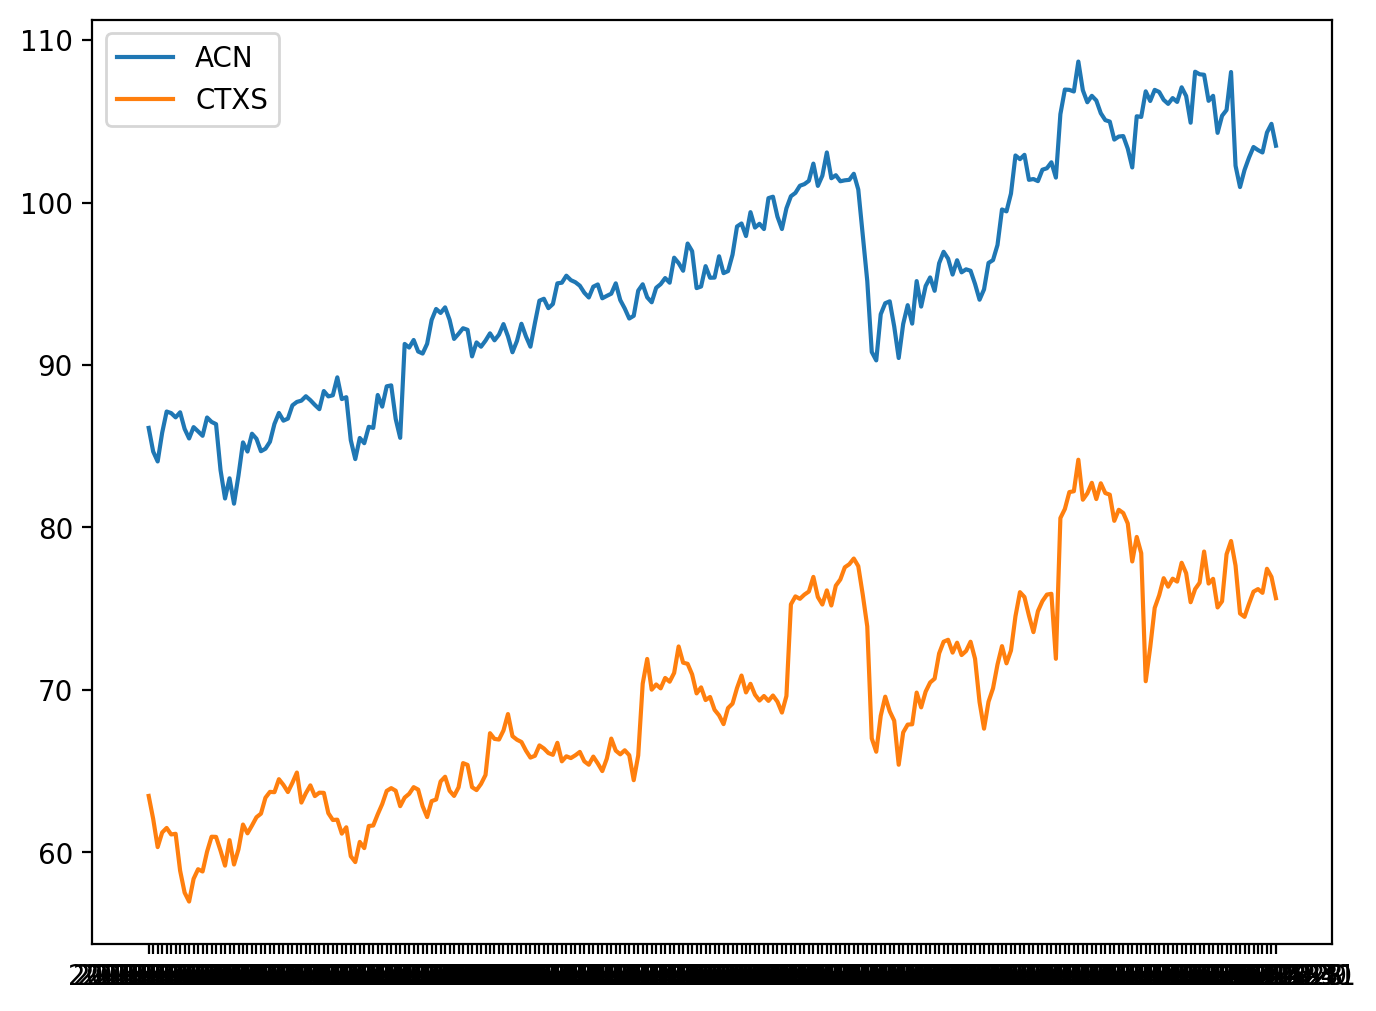

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
ACN = price_data['ACN']
CTXS = price_data['CTXS']
plt.plot(ACN, label = "ACN")
plt.plot(CTXS, label = "CTXS")
plt.legend()

### Step 2. Calculation of Spread

Calculate the Spread using both price difference and price ratio

Clearly from the image below we can see mean reverting nature

Text(0.5, 1.0, 'Price Difference between ACN and CTXS')

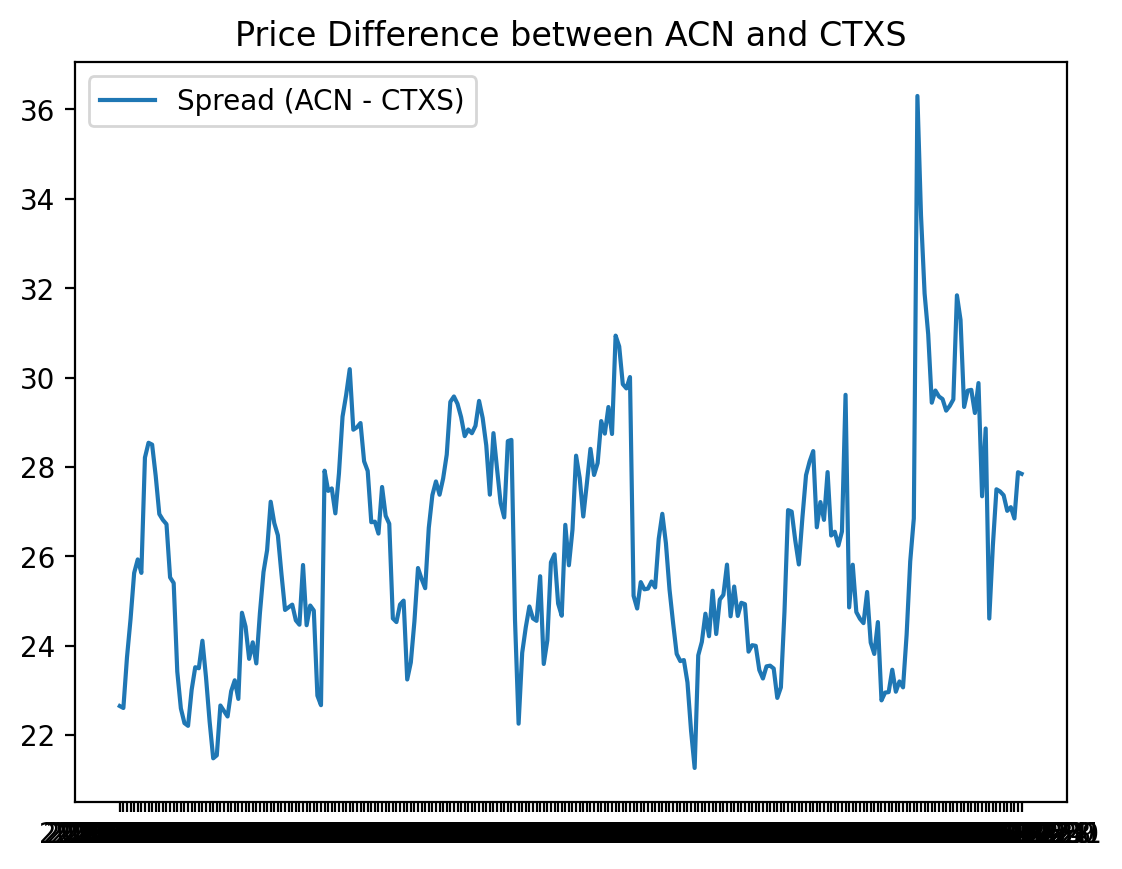

In [63]:
figure(dpi=200)
plt.plot(ACN - CTXS, label = 'Spread (ACN - CTXS)')
plt.legend()
plt.title("Price Difference between ACN and CTXS")

Text(0.5, 1.0, 'Price Ratio between ACN and CTXS')

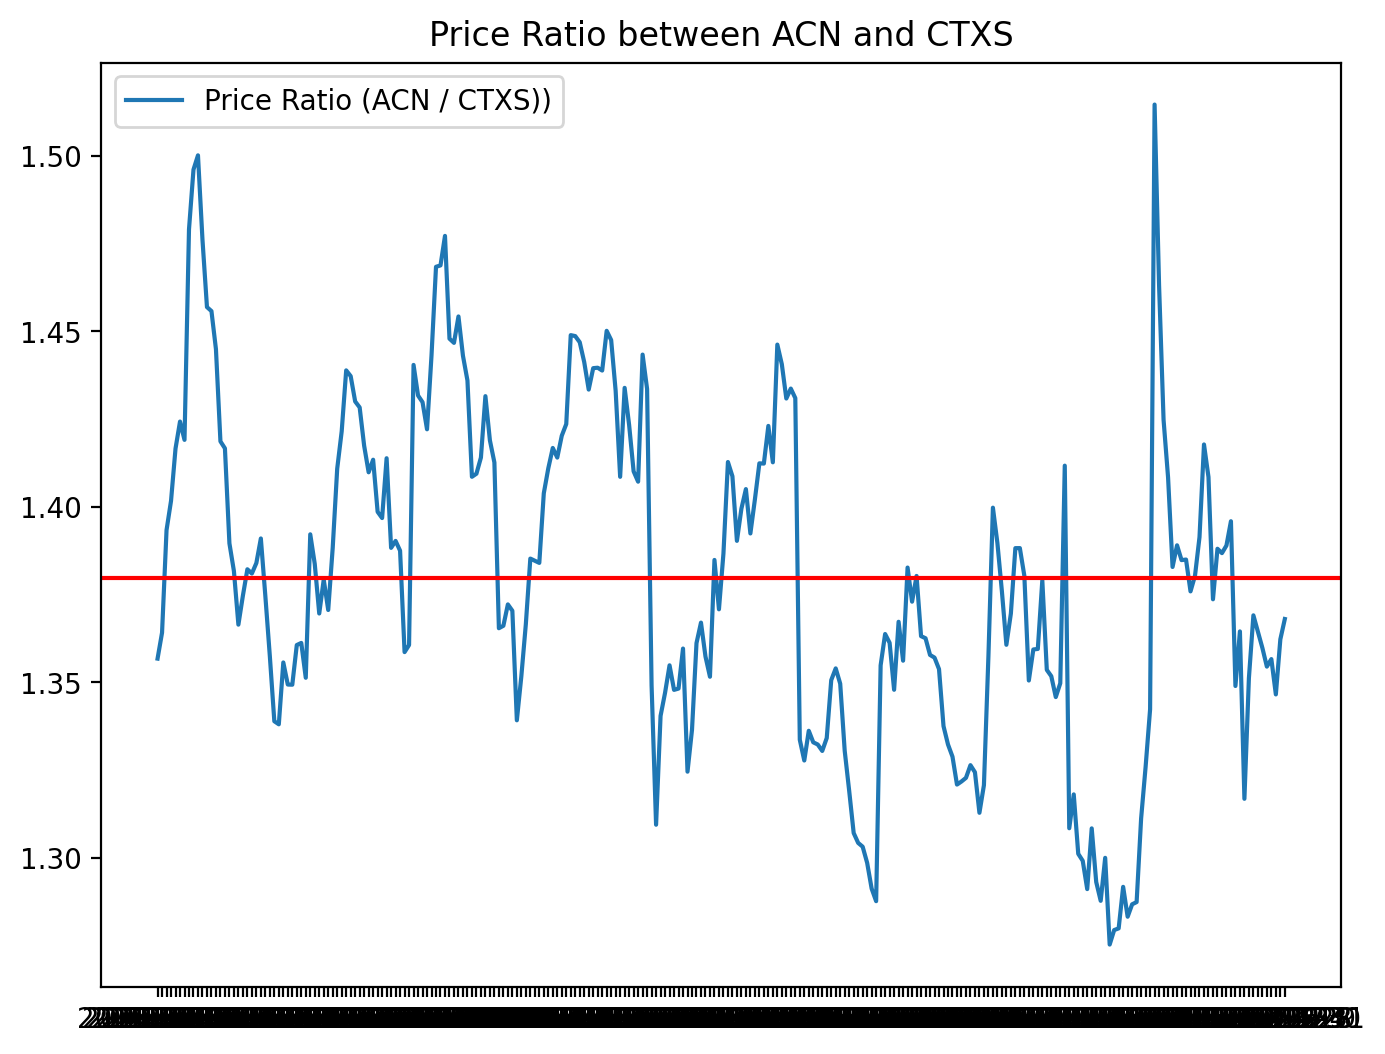

In [64]:
figure(figsize=(8, 6), dpi=200)
price_ratio = ACN / CTXS
plt.plot(price_ratio, label = 'Price Ratio (ACN / CTXS))')
plt.axhline(price_ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between ACN and CTXS")

### Step 3. Establishing Positions

We can either use the price difference or the price ratio approach. 
We will use price ratio data to establish the position.

First we need to standardize the ratio using Zscores, so we can form upper and lower bound to help evaluate our trends.

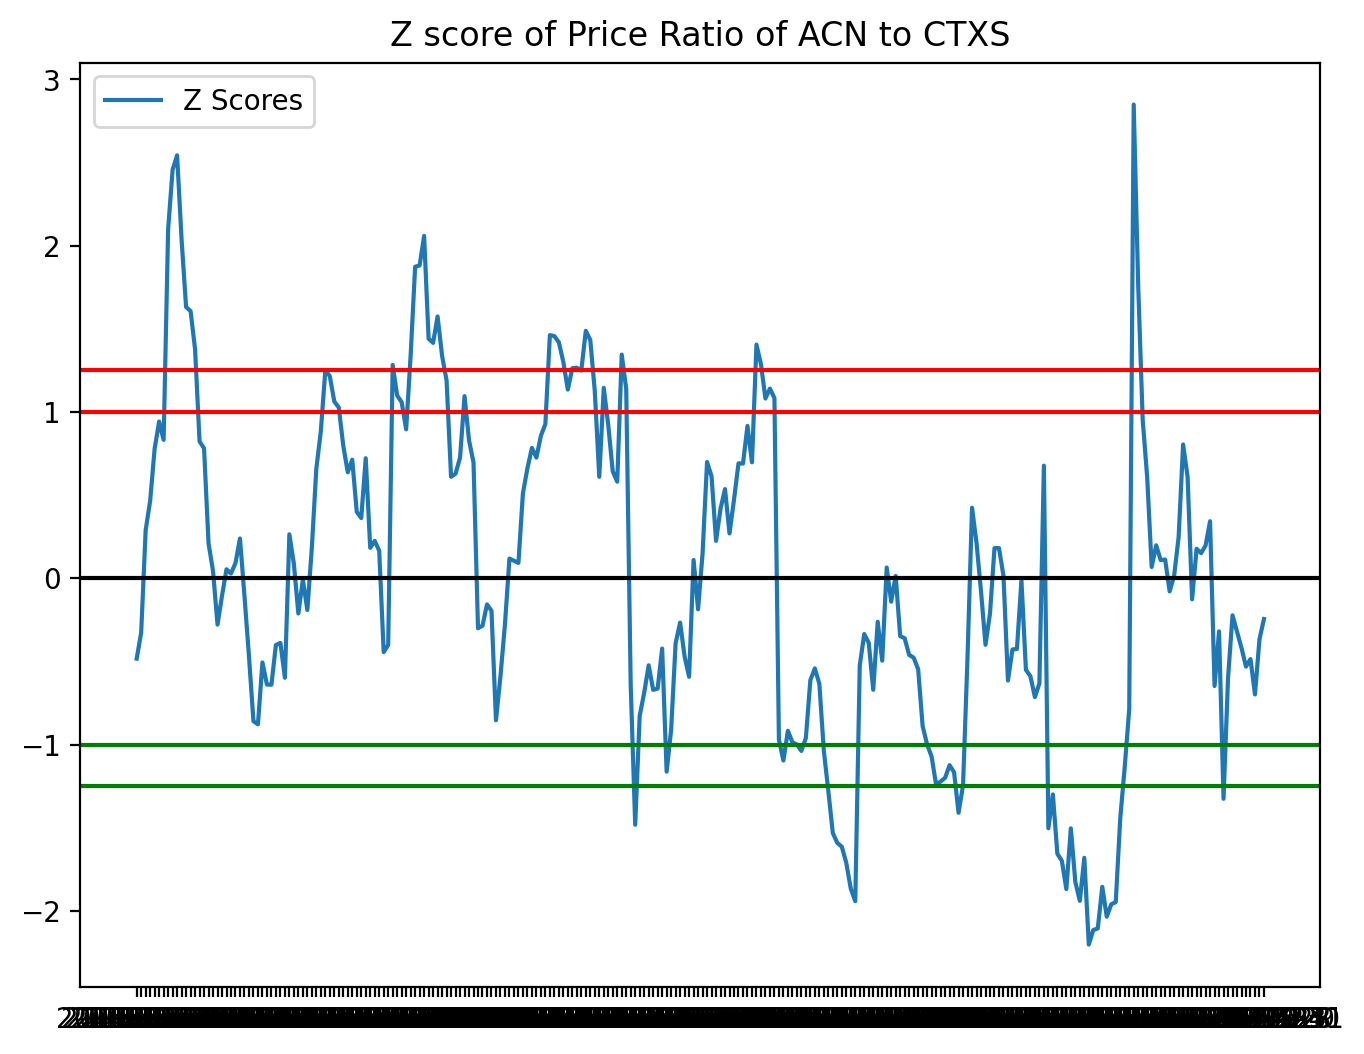

In [65]:
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (price_ratio - price_ratio.mean())/price_ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') 
plt.axhline(1.25, color='red') 
plt.axhline(-1.0, color='green') 
plt.axhline(-1.25, color='green')
plt.legend(loc = 'best')
plt.title('Z score of Price Ratio of ACN to CTXS')
plt.show()

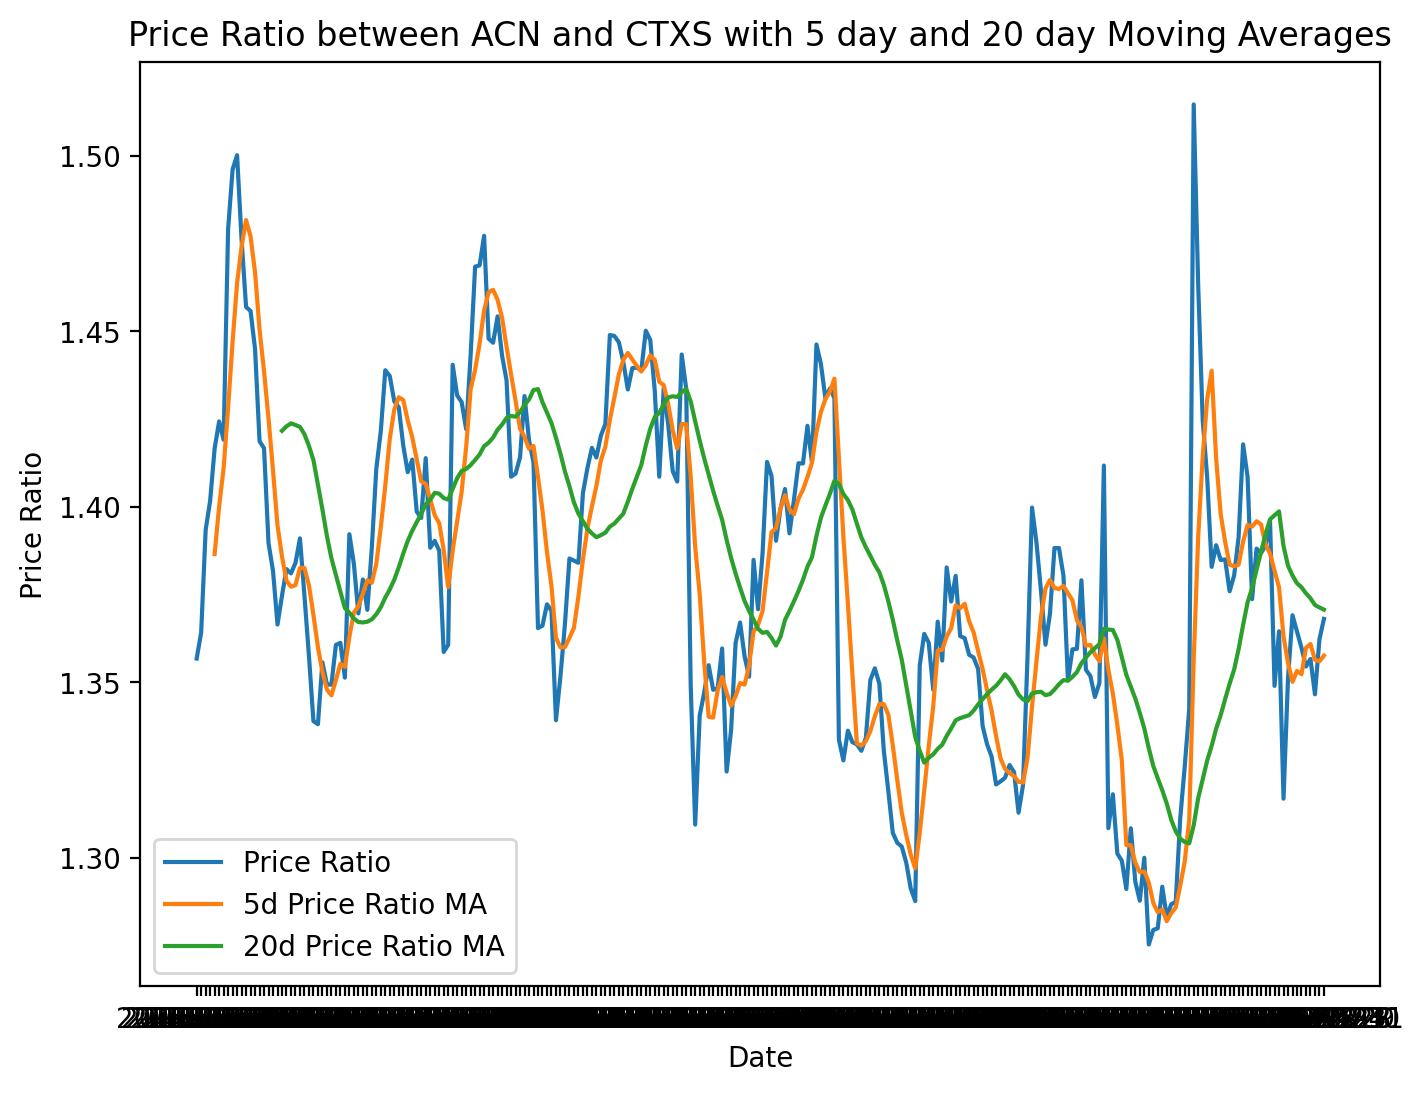

In [66]:
figure(figsize=(8, 6), dpi=200)
price_ratios_mavg5 = price_ratio.rolling(window=5, center=False).mean()
price_ratios_mavg20 = price_ratio.rolling(window=20, center=False).mean()
std_20 = price_ratio.rolling(window=20, center=False).std()
zscore_20_5 = (price_ratios_mavg5 - price_ratios_mavg20)/std_20
plt.plot(price_ratio.index, price_ratio.values)
plt.plot(price_ratios_mavg5.index, price_ratios_mavg5.values)
plt.plot(price_ratios_mavg20.index, price_ratios_mavg20.values)
plt.legend(['Price Ratio', '5d Price Ratio MA', '20d Price Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Price Ratio')
plt.title('Price Ratio between ACN and CTXS with 5 day and 20 day Moving Averages')
plt.show()

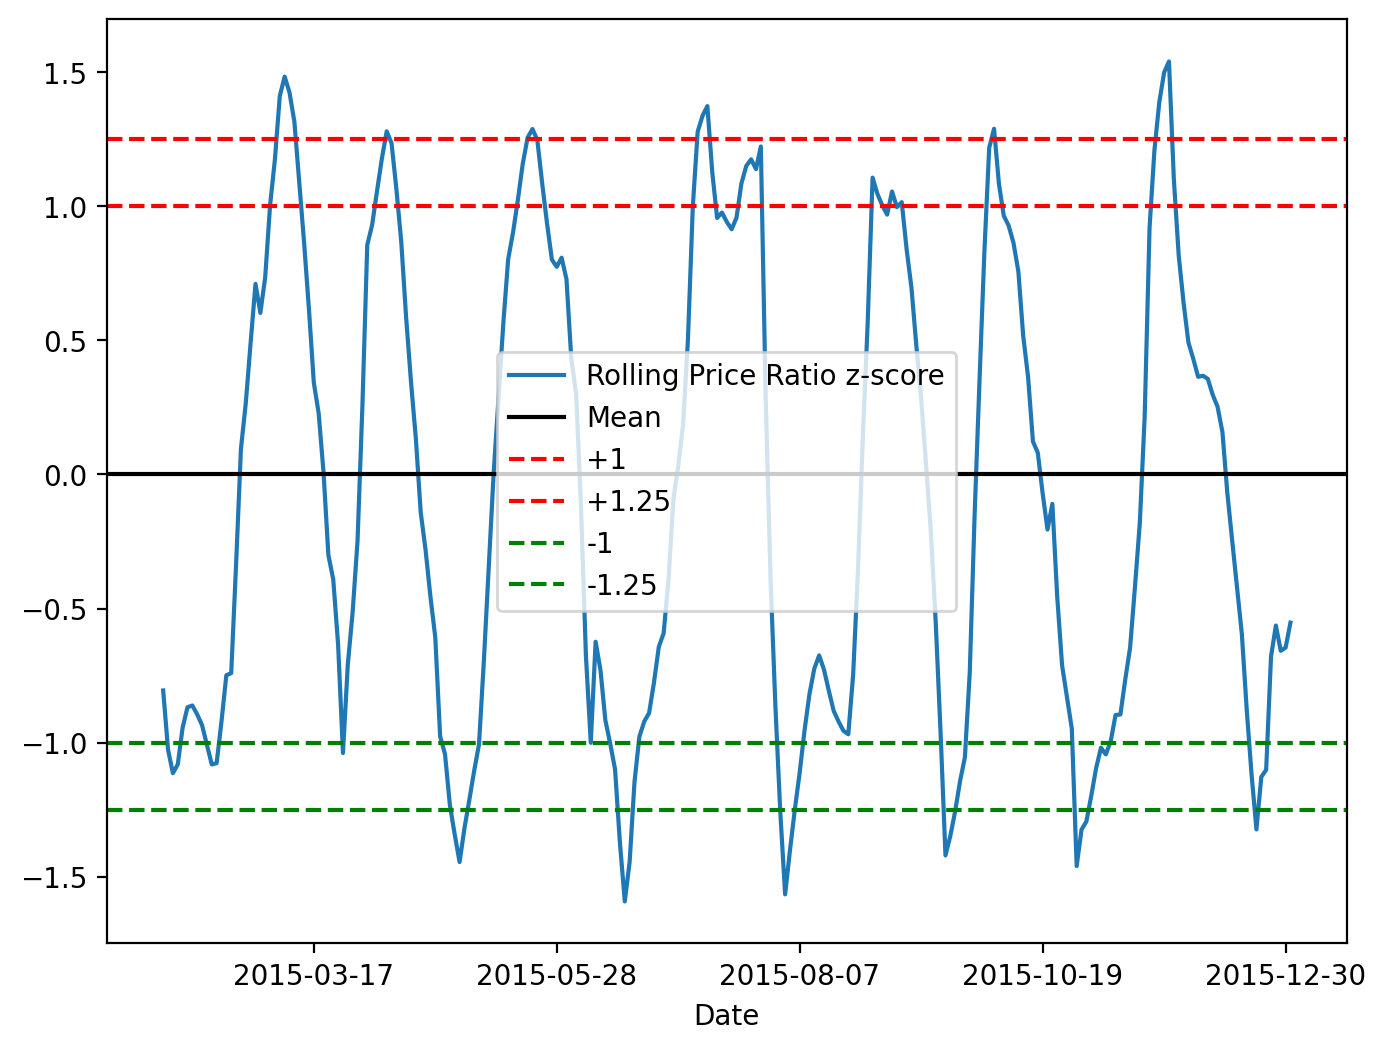

In [67]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Price Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

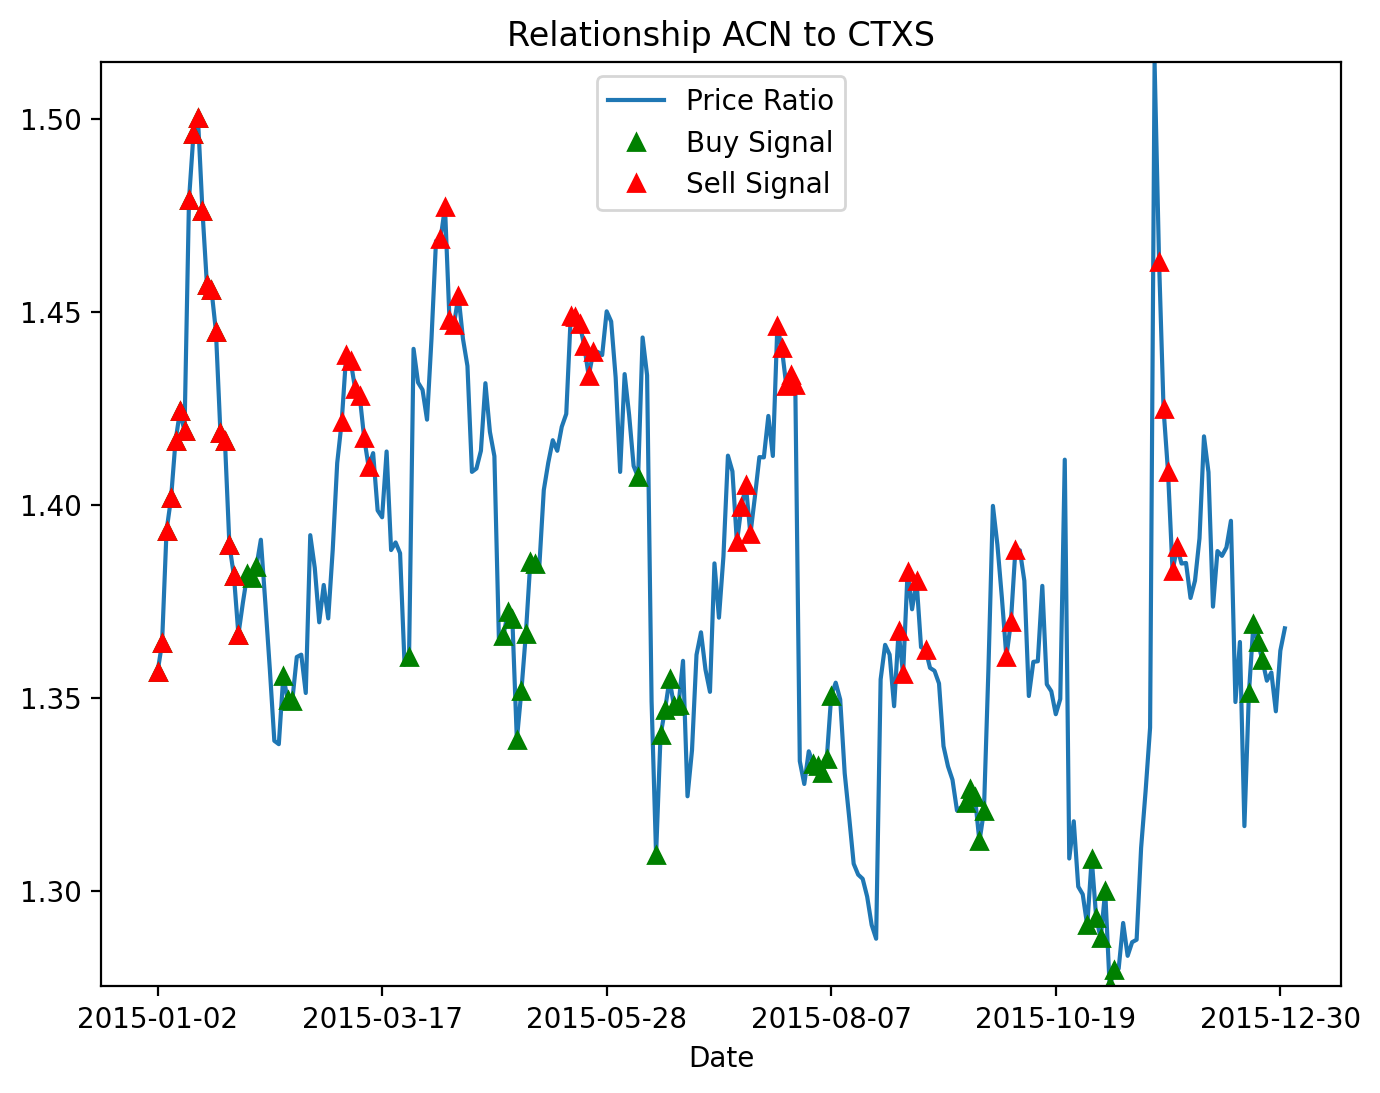

In [68]:
figure(figsize=(8, 6), dpi=200)
price_ratio.plot()
buy = price_ratio.copy()
sell = price_ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, price_ratio.min(), price_ratio.max()))
plt.legend(['Price Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship ACN to CTXS')
plt.show()

**The green arrow indicates a recommendation to purchase ACN and divest from CTXS, aiming to purchase at lower prices and sell at higher prices until a red arrow is encountered. The underlying principle is that the price ratio consistently fluctuates around its mean value.**

Bellow we do the same thing as before but for 2017 values.

{'CCI': {'AMT', 'CCI'}, 'WYN': {'FLR', 'ECL', 'HIG', 'AAL', 'WMB', 'CME', 'JEC', 'AMP', 'FCX', 'AXP', 'WYN', 'LUK', 'VMC', 'XL', 'COF', 'BAC', 'HON', 'CBG', 'EMN', 'APH', 'DHR', 'AON', 'CA', 'BWA', 'EOG', 'TRV', 'MAR', 'PGR', 'TXT', 'DHI', 'XEC', 'ITW', 'SWK', 'MU', 'FB', 'NTRS', 'GLW', 'NOC', 'AMG', 'MSFT', 'CRM', 'VRSN', 'GS', 'FLS', 'ALK', 'SWKS', 'ADSK', 'PXD', 'LEG', 'DE', 'SCHW', 'TROW', 'PBCT', 'JPM', 'MPC', 'LH', 'NUE', 'KEY', 'MTB', 'AIZ', 'IP', 'MOS', 'XYL', 'LUV', 'APC', 'AVGO', 'SHW', 'DAL', 'GPN', 'EA', 'F', 'ZION', 'HRS', 'BK', 'FBHS', 'ETFC', 'NDAQ', 'MET', 'KLAC', 'KMI', 'USB', 'SPGI', 'PH', 'PPG', 'RTN', 'ADI', 'CB', 'LMT', 'AME', 'MA', 'MLM', 'KSU', 'AAPL', 'ADBE', 'HES', 'GT', 'MS', 'V', 'LLL', 'CVX', 'STI', 'SLB', 'VLO', 'PRU', 'LEN', 'DGX', 'ISRG', 'MRO', 'HAL', 'LNC', 'STT', 'URI', 'PX', 'UPS', 'PWR', 'NOV', 'CTAS', 'UAL', 'UNP', 'MAS', 'A', 'AMAT', 'NVDA', 'INTC', 'GOOG', 'WFC', 'WAT', 'CF', 'PNR', 'RF', 'GM', 'ROK', 'CHK', 'ADS', 'BLL', 'ROP', 'DFS', 'BEN', 'BBT

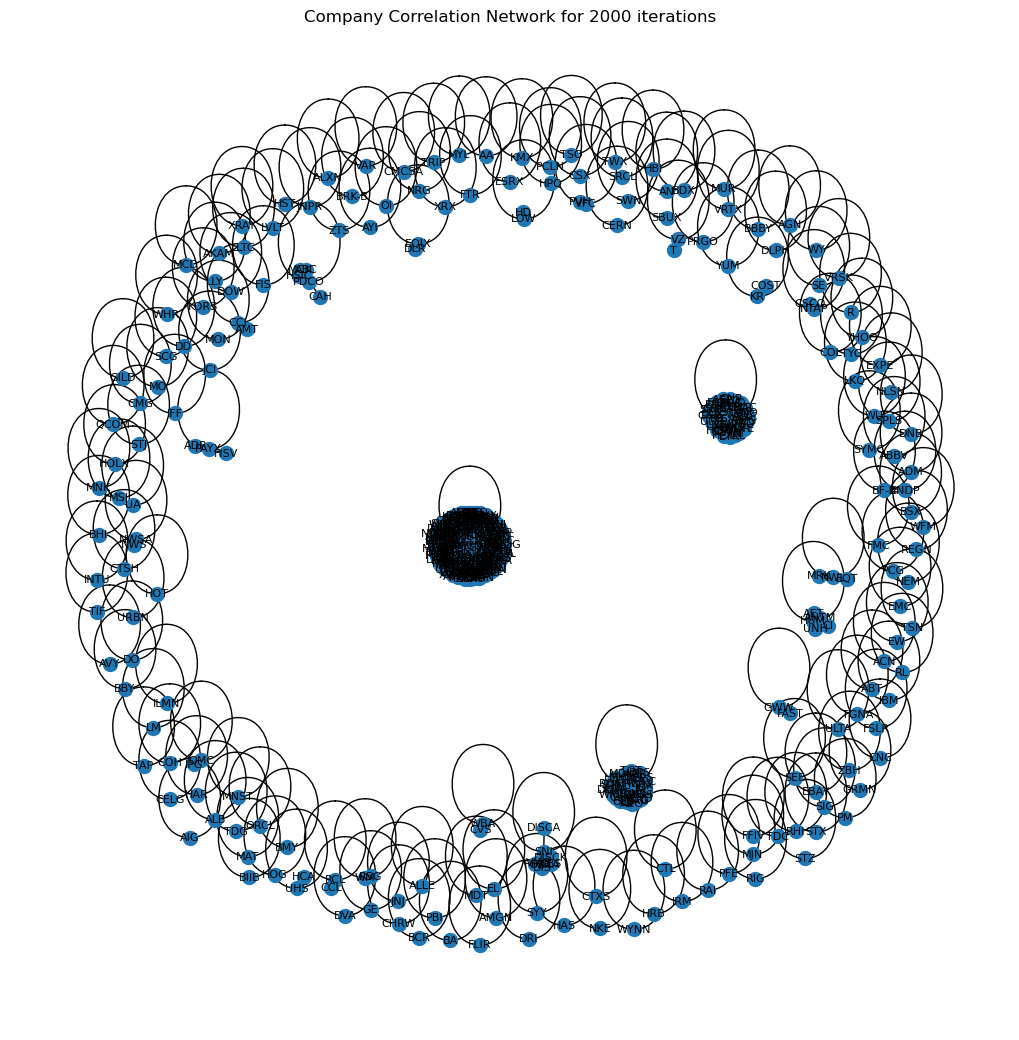

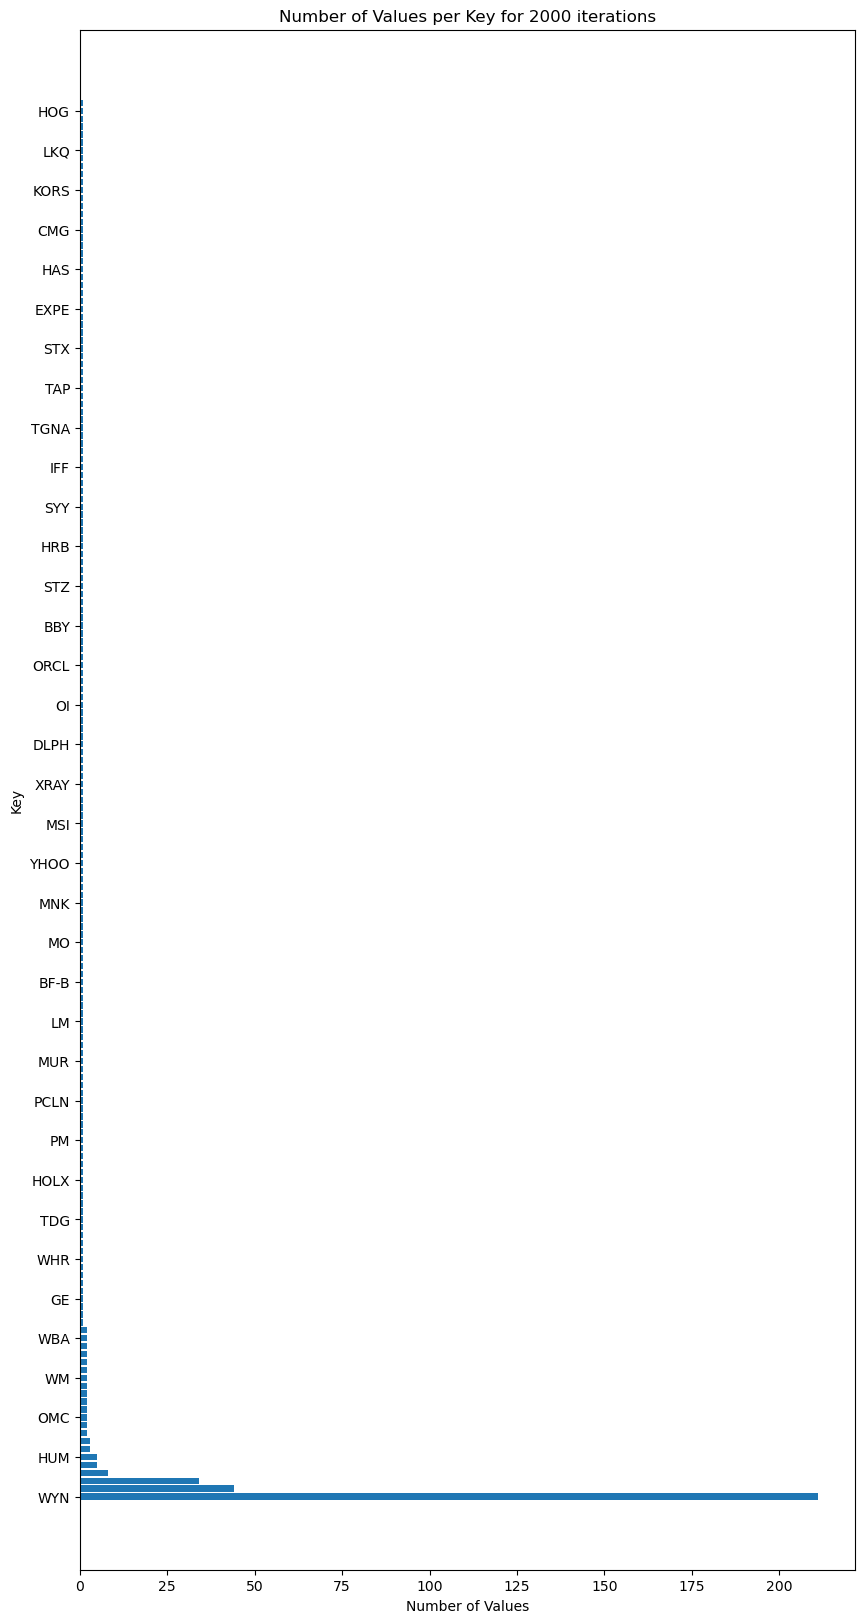

{'NRG': {'AMT', 'ECL', 'QCOM', 'FCX', 'ADM', 'COF', 'MON', 'DTE', 'EMN', 'CI', 'GE', 'HCN', 'NRG', 'EXR', 'CAH', 'AEP', 'T', 'CNP', 'BSX', 'TGT', 'PGR', 'PPL', 'DHI', 'EQR', 'MU', 'NTRS', 'TSCO', 'SO', 'AMG', 'PG', 'VRSN', 'ADP', 'GS', 'FLS', 'ALK', 'PXD', 'OMC', 'SYMC', 'WHR', 'JPM', 'MOS', 'LUV', 'KIM', 'SHW', 'DAL', 'AMGN', 'F', 'HST', 'AIV', 'ETFC', 'MET', 'EQIX', 'RTN', 'PPG', 'JNJ', 'FMC', 'HES', 'TDG', 'CVX', 'WMT', 'PRU', 'SLG', 'AEE', 'VRTX', 'WM', 'CERN', 'HPQ', 'UNP', 'NVDA', 'HOLX', 'GOOG', 'CHK', 'HUM', 'AVB', 'DFS', 'BEN', 'SNA', 'IPG', 'HBI', 'MRK', 'UA', 'IBM', 'PM', 'TMK', 'WEC', 'ALLE', 'RHT', 'CMI', 'CCI', 'AMZN', 'MCHP', 'ICE', 'KMX', 'PCLN', 'WDC', 'JBHT', 'TEL', 'XOM', 'DVN', 'DOV', 'D', 'TXN', 'FRT', 'CMA', 'TMO', 'ABBV', 'HCP', 'HD', 'PLD', 'ALXN', 'AJG', 'OXY', 'DISCK', 'GOOGL', 'UNM', 'FAST', 'SYF', 'CHRW', 'ETR', 'ESS', 'PNC', 'APD', 'PSA', 'CMCSA', 'FLR', 'AAL', 'WMB', 'JEC', 'VMC', 'ES', 'GGP', 'APH', 'DHR', 'CA', 'PVH', 'JWN', 'YUM', 'M', 'FB', 'CHD', 'NOC

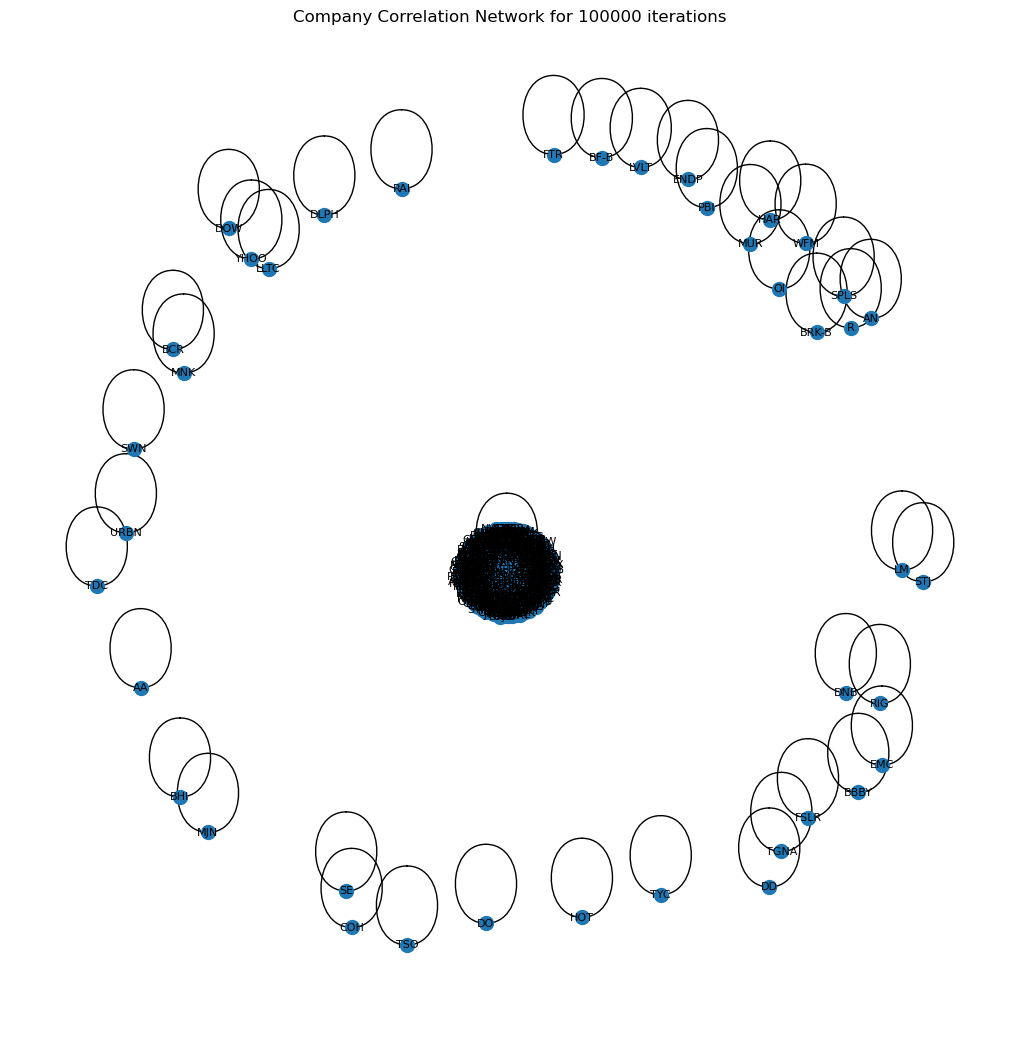

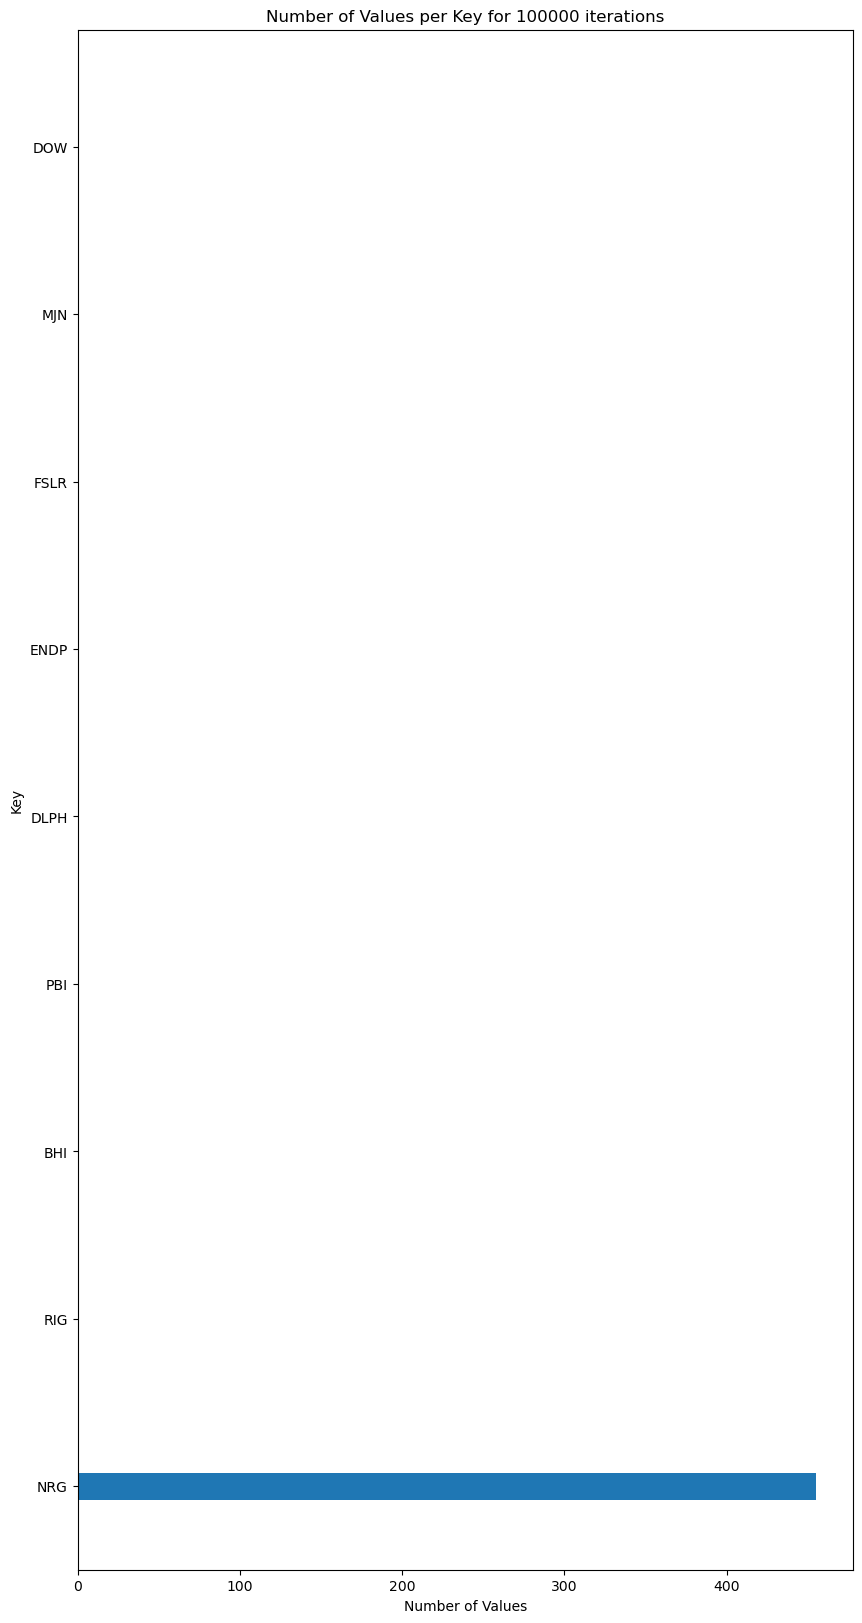

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv

# Read price data with pandas
filename = 'all_stocks_5yr.csv'
price_data = pd.read_csv(filename, usecols=[6,4,0])

filename_hw = 'SP_500_close_2015.csv'
price_data_hw = pd.read_csv(filename_hw, index_col=0)

price_data_hw = price_data_hw.sort_index(axis=1)

price_data['date'] = pd.to_datetime(price_data['date'])

price_data = price_data[price_data['date'].dt.year == 2017]

pivot_df = price_data.pivot(index='date', columns='Name', values='close')


for name in pivot_df.columns: #We remove the companies which aren't present in 2013's list
    if name not in price_data_hw.columns:
        pivot_df = pivot_df.drop(name, axis=1)
        
        
returns_prices_new = (pivot_df - pivot_df.shift(1)) / pivot_df.shift(1)
correlations_returns_new = returns_prices_new.corr()
edge_list_new = create_correlation_list(correlations_returns_new)
set_starters_new , next_nodes_new = cluster_correlations(edge_list_new, firms, k=2000)
all_clusters_new = construct_sets(set_starters_new,next_nodes_new)

print(all_clusters_new)
data = all_clusters_new
# Calculate the number of values for each key
key_counts = {key: len(value) for key, value in data.items()}

G = nx.Graph()
for company, correlated_companies in all_clusters_new.items():
    for correlated_company in correlated_companies:
        G.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 2000 iterations')
plt.show()

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key for 2000 iterations')

plt.show()

set_starters_new , next_nodes_new = cluster_correlations(edge_list_new, firms, k=100000)
all_clusters_new = construct_sets(set_starters_new,next_nodes_new)

print(all_clusters_new)
data = all_clusters_new

print(all_clusters_new)
data = all_clusters_new
# Calculate the number of values for each key
key_counts = {key: len(value) for key, value in data.items()}

G = nx.Graph()
for company, correlated_companies in all_clusters_new.items():
    for correlated_company in correlated_companies:
        G.add_edge(company, correlated_company)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Company Correlation Network for 100000 iterations')
plt.show()

# Calculate the number of values for each key
key_counts = {key: len(value) for key, value in data.items()}

sorted_keys = sorted(key_counts.keys(), key=lambda x: key_counts[x], reverse=True)
sorted_counts = [key_counts[key] for key in sorted_keys]

# Create a horizontal bar chart
plt.figure(figsize=(10, 20)) 
plt.barh(range(len(sorted_keys)), sorted_counts, align='center')
plt.yticks(range(0, len(sorted_keys), 5), sorted_keys[::5])
plt.xlabel('Number of Values')
plt.ylabel('Key')
plt.title('Number of Values per Key for 100000 iterations')

plt.show()


#### Some discussion over the previous clustering approach we use

The previous clustering approach we use is a division of agglomerative clustering. The general outline of agglomerative clustering is:

1. For n objects v1, ..., vn, assign each to a singleton cluster Ci = vi

2. Use any computable cluster similarity measure D(Ci, Cj) e.g., Euclidean distance, cosine distance etc.

3. Repeat:

    - identify the two most similar clusters Cj and Ck (could be ties, and choose one pair)
    - delete Cj and Ck, and add (Cj U Ck) to the set of clusters
    
    until just one cluster remains.

4. Use a dendrogram diagram to show the sequence of cluster mergers

There are multiple strategies for distance measurement between joint clusters(D):

1. single linkage: D is taken as the minimum distance between samples in sub-clusters.

2. complete linkage: D is taken as the maximum distance between samples in sub-clusters.

3. average linkage: D is taken as the average distance between each pair of samples in sub-clusters.

In the previous clustering example, we set the correlation of two stocks as the distance between two nodes. Thus, this approach is the complete linkage solution for agglomerative clustering. In general, agglomerative clustering is the most basic clustering method as it simply compares optimal selected distances for all nodes and there are limitations doing this way. To improve, we introduce more advanced divisive clustering. A typical method for division clustering is K-means algorithm.
    


#### Other Clustering Methods Example - K-means

This is an algorithm to classify objects based on attributes or features into k number of groups, where k is a positive integer. The characteristic of K-means algorithm is that we calculate a new centroid and update distances after each assignment for nodes, rather than keeping simple distances between nodes for the whole time.

In this scenario, we do not use correlation as the criteria to cluster stocks. We choose two characteristics for the stocks: Yearly volatility and Yearly Return. We pre-set the clusters to 10.

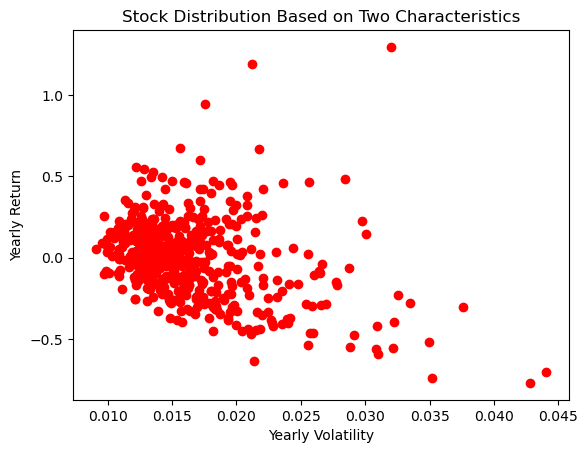

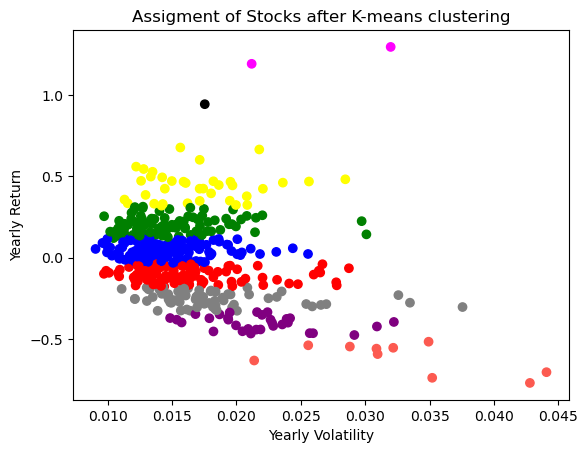

In [70]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

from collections import defaultdict
from random import uniform
from math import sqrt


def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            d[row['Symbol']] = [row['Name'], row['Sector']]
    return d


def as_point_format(x_axis, y_axis):
    """
    Combine the x list and the y list into point (x,y) format
    """
    points = list(zip(x_axis, y_axis))
    return points


def center_point(points):
    """
    Returns the center point of all the points.
    """
    # Note - Allow multiple dimensions
    dimension = len(points[0])

    center = []

    for x in range(dimension):
        total_dim = 0  # dimension sum

        for p in points:
            total_dim += p[x]

        # average of each dimension
        center.append(total_dim / float(len(points)))

    return center


def distance(a, b):
    """
    Compute the distance between two points
    """
    dimensions = len(a)

    distances = 0

    if a != 0 and b != 0:
        for dimension in range(dimensions):
            dimensional_difference = (a[dimension] - b[dimension]) ** 2
            distances += dimensional_difference

    else:
        distances += 0

    return sqrt(distances)


def assign_points(points, centers):
    """
    For given dataset "points":
    assign each point to an index that corresponds to the index
    of the center point on its proximity to that point.

    Return an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements.
    """
    assignments = []

    for point in points:
        shortest = float('inf')  # Positive Infinity
        shortest_index = 0

        for i in range(len(centers)):
            distances = distance(point, centers[i])

            if distances < shortest:
                shortest = distances
                shortest_index = i

        assignments.append(shortest_index)

    return assignments


def group_centers(points, assignments):
    """
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of assignments.
    """
    new_means = defaultdict(list)
    centers = []

    for assignment, point in zip(assignments, points):
        new_means[assignment].append(point)

    for points in new_means.values():
        centers.append(center_point(points))

    return centers


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for k in range(k):
        random_point = []

        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]

            random_point.append(uniform(min_val, max_val))

        centers.append(random_point)

    return centers


def k_means(dataset, k):
    """
    Apply the k-means algorithm
    """
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None

    while assignments != old_assignments:
        new_centers = group_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)

    return assignments


# ------------------- End of functions ------------------- #

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

first_price = price_data.iloc[0]
last_price = price_data.iloc[-1]
returns_prices = (price_data - price_data.shift(1)) / price_data.shift(1)

# Calculate the two a-xis
yearly_returns = (last_price - first_price) / first_price
yearly_volatilities = returns_prices.std()

# ------------------- Parameter Setting Part ------------------- #
# Set two characteristics of stocks as the attribute
x_attribute = yearly_volatilities
y_attribute = yearly_returns
preset_cluster_number = 10
# -------------------------------------------------------------- #

# Create a plot with the stock's yearly_return and yearly_volatility
plt.scatter(x_attribute, y_attribute, label='Scatter Plot', color='red', marker='o')
plt.xlabel('Yearly Volatility')
plt.ylabel('Yearly Return')
plt.title('Stock Distribution Based on Two Characteristics')

# Display the plot
plt.show()

# Based on the two attributes, format the stocks as points
stocks = as_point_format(x_attribute, y_attribute)

# Apply K-means
K_means_assignment = k_means(stocks, preset_cluster_number)

# ------------------- Part that needs modifying if parameters changed ------------------- #
set_colors = []

for number in K_means_assignment:
    if number == 0:
        set_colors.append('red')
    elif number == 1:
        set_colors.append('blue')
    elif number == 2:
        set_colors.append('green')
    elif number == 3:
        set_colors.append('black')
    elif number == 4:
        set_colors.append('yellow')
    elif number == 5:
        set_colors.append("grey")
    elif number == 6:
        set_colors.append("purple")
    elif number == 7:
        set_colors.append('magenta')
    elif number == 8:
        set_colors.append('xkcd:coral')
    elif number == 9:
        set_colors.append('xkcd:teal')
    elif number == 10:
        set_colors.append('xkcd:lavender')
# ---------------------------------------------------------------------------------------- #

# Draw plot after the K-means clustering
x, y = zip(*stocks)
plt.scatter(x, y, color=set_colors, label='Scatter Plot', marker='o')
plt.xlabel('Yearly Volatility')
plt.ylabel('Yearly Return')
plt.title('Assigment of Stocks after K-means clustering')
plt.show()

We could see that the stocks are assigned to 10 clusters. For stocks in each cluster, they are similar in yearly return divided by yearly volatility.

We could also extend this model by adding another characteristic, let's say the last price of each stock. Then the model creates a three-dimensional result.

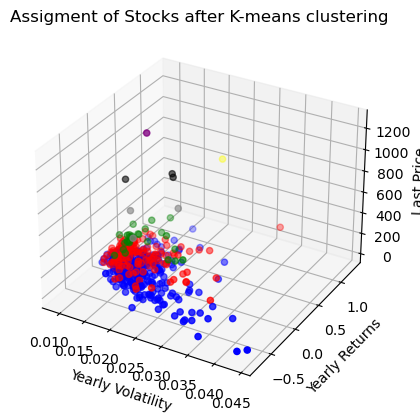

In [71]:
def as_point_format(x_axis, y_axis, z_axis):
    """
    Combine the x list and the y list into point (x,y) format
    """
    points = list(zip(x_axis, y_axis, z_axis))
    return points


# ------------------- Parameter Setting Part ------------------- #
# Set two characteristics of stocks as the attribute
x_attribute = yearly_volatilities
y_attribute = yearly_returns
z_attribute = last_price
preset_cluster_number = 10
# -------------------------------------------------------------- #

# Based on the two attributes, format the stocks as points
stocks = as_point_format(x_attribute, y_attribute, z_attribute)

# Apply K-means
K_means_assignment = k_means(stocks, preset_cluster_number)

# ------------------- Part that needs modifying if parameters changed ------------------- #
set_colors = []

for number in K_means_assignment:
    if number == 0:
        set_colors.append('red')
    elif number == 1:
        set_colors.append('blue')
    elif number == 2:
        set_colors.append('green')
    elif number == 3:
        set_colors.append('black')
    elif number == 4:
        set_colors.append('yellow')
    elif number == 5:
        set_colors.append("grey")
    elif number == 6:
        set_colors.append("purple")
    elif number == 7:
        set_colors.append('magenta')
    elif number == 8:
        set_colors.append('xkcd:coral')
    elif number == 9:
        set_colors.append('xkcd:teal')
    elif number == 10:
        set_colors.append('xkcd:lavender')
# ---------------------------------------------------------------------------------------- #

# Draw plot after the K-means clustering
x, y, z = zip(*stocks)

# Create a 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x, y, z, c=set_colors, marker='o')
ax.set_xlabel('Yearly Volatility')
ax.set_ylabel('Yearly Returns')
ax.set_zlabel('Last Price')
plt.title('Assigment of Stocks after K-means clustering')

# Display the plot
plt.show()

We could further extend this K-means model into 4, 5 to even n dimensions. In those cases we cannot visualize the clusters, but could still get results via lists. 



## The End!